# Zomato Restaurant Project

## Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

## Dataset Description
This project will utilize two datasets: Zomato.csv, which includes information about various restaurants in many countries, and Country_Code.csv, which contains two variables, namely country code and country name.

## Attributes Description
Restaurant Id: Unique id of every restaurant across various cities of the world.

Restaurant Name: Name of the restaurant.

Country Code: Country in which restaurant is located.

City: City in which restaurant is located.

Address: Address of the restaurant.

Locality: Location in the city.

Locality Verbose: Detailed description of the locality.

Longitude: Longitude coordinate of the restaurant.

Latitude: Latitude coordinate of the restaurant.

Cuisines: Cuisines offered by the restaurant.

Average Cost for two: Cost for two people in different currencies.

Currency: Currency of the country.

Has Table booking: yes/no.

Has Online delivery: yes/ no.

Is delivering: yes/ no.

Switch to order menu: yes/no.

Price range: range of price of food.

Aggregate Rating: Average rating out of 5.

Rating color: depending upon the average rating color.

Rating text: text on the basis of rating of rating.

Votes: Number of ratings casted by people.


## Objective
The objective of this project is to predict average cost of food for two people ('Average Cost for two') and range of price of food ('Price range') based on the details provided in the dataset. In this project, the prediction of average cost of food for two people and range of price of food involves the implementation of two separate models, regression model for predicting average cost of food for two people and classification model for predicting range of price of food.

## Features and Target variable for Predicting Average Cost of Food for Two People 

### Features
Restaurant ID, Restaurant Name, Country Code, Country, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines,  Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes

### Target variable
Average Cost for two

## Features and Target variable for Predicting Range of Price of Food

### Features
Restaurant ID, Restaurant Name, Country Code, Country, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Aggregate rating, Rating color, Rating text, Votes

### Target variable
Price range

# Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regression models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

# K-Nearest Neighbors Classifier and Regressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree Classifier and Regressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Support Vector Classifier and Regressor
from sklearn.svm import SVC, SVR

# Ensemble Algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, 
r2_score)
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

# Importing Dataset

In [2]:
# Load data from CSV into dataframe
df1 = pd.read_csv('Zomato.csv')          # Dataset containing restaurants details
df2 = pd.read_csv('Country-Code.csv')    # Dataset containing country code and country name

In [3]:
# Display df1 dataframe
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
# Display df2 dataframe
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Combining both the datasets.

In [5]:
# Merge df1 and df2 dataframes
df = pd.merge (df1, df2) 

Both the datasets merged successfully.

In [6]:
# Display first 5 rows of the dataframe
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [7]:
# Display last 5 rows of the dataframe
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


# Exploratory Data Analysis

In [8]:
# Display shape of the dataframe
df.shape

(9551, 22)

Dataframe has 9551 rows and 22 columns.

In [9]:
# Display the names of the columns 
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
# Display the datatype of each column
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

Columns such as 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', and 'Country' have an 'object' data type.

Columns such as 'Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', and 'Votes' have an 'int' data type.

Columns 'Longitude', 'Latitude', and 'Aggregate rating' have a 'float6' data type.

## Data Preprocessing

In [11]:
# Checking for if any ' ','NA','-', or '-' exist in dataset.
df1.isin([' ','NA','-','?']).any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

No ' ','?', 'NA', or '-' present in the dataset.

In [12]:
# Checking for the duplicated rows in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [13]:
# Checking for the null values in the dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

No null values are present in the dataset.

In [14]:
# Checking for the number of unique values present inside each column
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

Restaurant ID: 9551 unique values (Restaurant IDs).

Restaurant Name: 7446 unique values (Names of restaurants).

Country Code: 15 unique values (Country codes).

City: 141 unique values (City names).

Address: 8918 unique values (Restaurant addresses).

Locality: 1208 unique values (Localities).

Locality Verbose: 1265 unique values (Detailed locality descriptions).

Longitude: 8120 unique values (Longitude coordinates).

Latitude: 8677 unique values (Latitude coordinates).

Cuisines: 1825 unique values (Types of cuisines offered).

Average Cost for two: 140 unique values (Average cost for two people).

Currency: 12 unique values (Currencies).

Has Table booking: 2 unique values (Yes/No for table booking).

Has Online delivery: 2 unique values (Yes/No for online delivery).

Is delivering now: 2 unique values (Yes/No for delivery status).

Switch to order menu: 1 unique value (Yes/No for switching to the order menu).

Price range: 4 unique values (Price ranges).

Aggregate rating: 33 unique values (Average ratings).

Rating color: 6 unique values (Colors corresponding to ratings).

Rating text: 6 unique values (Text descriptions of ratings).

Votes: 1012 unique values (Number of votes).

Country: 15 unique values (Country names).

It is evident that the dataset contains 15 countries, yet only 12 distinct currencies are provided. This suggests that either three currencies have not been specified, or some countries may have been associated with incorrect currencies.

In [15]:
# List of countries
countries = ['India', 'Australia', 'Brazil', 'Canada', 'Indonesia', 'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 
             'South Africa', 'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States']
for i in countries:
    print(i +": "+ df.loc[df['Country'] == i, 'Currency'].unique())

['India: Indian Rupees(Rs.)']
['Australia: Dollar($)']
['Brazil: Brazilian Real(R$)']
['Canada: Dollar($)']
['Indonesia: Indonesian Rupiah(IDR)']
['New Zealand: NewZealand($)']
['Phillipines: Botswana Pula(P)']
['Qatar: Qatari Rial(QR)']
['Singapore: Dollar($)']
['South Africa: Rand(R)']
['Sri Lanka: Sri Lankan Rupee(LKR)']
['Turkey: Turkish Lira(TL)']
['UAE: Emirati Diram(AED)']
['United Kingdom: Pounds(��)']
['United States: Dollar($)']


Australia is assigned with 'Dollar' as its currency but cuurency of Australia is 'Australian Dollar', Canada is also assigned with 'Dollar' as its currency but currency of Canada is 'Canadian Dollar', Singapore is also assigned with 'Dollar' as its currency but currency of Singapore is 'Singapre Dollar', and Phillipines is assigned with 'Botswana Pula(P) as its currency which is the currency of Botswana but Botswana country is not mentioned in the dataset, therefore currency for Philliphines should be the 'Philippine Peso'.

In [16]:
# Assigning countries with their official currency
df.loc[df['Country'] == 'Australia', 'Currency'] = 'Australian ($)'
df.loc[df['Country'] == 'Canada', 'Currency'] = 'Canadian ($)'
df.loc[df['Country'] == 'Phillipines', 'Currency'] = 'Philippine Peso (PHP)'
df.loc[df['Country'] == 'Singapore', 'Currency'] = 'Singapore ($)'

Converting currency for respective country in USD for further analysis. 

*Note: These are the current approximate currency values for respective countries in USD.

India: 1 USD = 83.26 INR

Australia: 1 USD = 0.63 AUD

Brazil: 1 USD = 5.26 BRL

Canada: 1 USD = 1.33 CAD

Indonesia: 1 USD = 0.000068 USD

New Zealand: 1 USD = 1.67 NZD

Philippines: 1 USD = 55.87 PHP

Qatar: 1 USD = 3.70 QAR

Singapore: 1 USD = 1.39 SGD

South Africa: 1 USD = 15.87 ZAR

Sri Lanka: 1 USD = 378.00 LKR

Turkey: 1 USD = 18.90 TRY

UAE: 1 USD = 3.70 AED

United Kingdom: 1 USD = 1.13 GBP

United States: 1 USD = 1.00 USD

In [17]:
# Converting currency for respective country in USD for further analysis
exchange_rates = {
    'Indian Rupees(Rs.)': 83.26,
    'Brazilian Real(R$)': 5.26,
    'Dollar($)': 1.00,
    'Emirati Diram(AED)': 3.70,
    'Indonesian Rupiah(IDR)': 14170,
    'NewZealand($)': 1.67,
    'Pounds(��)': 0.88,
    'Qatari Rial(QR)': 3.70,
    'Rand(R)': 15.87,
    'Sri Lankan Rupee(LKR)': 378.00,
    'Turkish Lira(TL)': 18.90,
    'Canadian ($)': 1.33,  
    'Australian ($)': 1.59,   
    'Philippine Peso (PHP)': 55.87,  
    'Singapore ($)': 1.39  
}

# Function to extract currency and convert to USD
def convert_to_usd(row):
    currency = row['Currency']
    exchange_rate = exchange_rates.get(currency, 1.0)  # Default to 1.0 if currency not found
    cost_in_usd = row['Average Cost for two'] / exchange_rate
    return cost_in_usd

# Apply the conversion function to the DataFrame
df['Average Cost for two'] = df.apply(convert_to_usd, axis = 1)

## Feature Engineering

Creating new column in dataset with the name 'Cuisine Count'.

In [18]:
cuisine_counts = []

for cuisines in df['Cuisines']:
    if isinstance(cuisines, str):
        cuisine_list = cuisines.split(', ')
        count = len(cuisine_list)
    else:
        count = 0  # Assign 0 for missing or non-string values
    cuisine_counts.append(count)
    
df['Cuisine Count'] = cuisine_counts

In [19]:
# Separating numerical columns and categorical columns for further data analysis
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_columns.append(i)
    elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        numerical_columns.append(i)

In [20]:
# Display the list of categorical columns
categorical_columns

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [21]:
# Display the list of numerical columns
numerical_columns

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes',
 'Cuisine Count']

In [22]:
# Display the lengths of both the lists
print("No. of categorical columns:", len(categorical_columns))
print("No. of numerical columns:", len(numerical_columns))

No. of categorical columns: 14
No. of numerical columns: 9


In [23]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Restaurant Name :
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]


City :
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Athens' 'Augusta' 'Boise'
 'Cedar Rapids/Iowa City' 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton'
 'Davenport' 'Des Moines' 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview'
 'Lincoln' 'Macon' 'Mc Millan' 'Miller' 'Monroe' 'Ojo Caliente' 'Orlando'
 'Pensacola' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay' 'Armidale' 'Balingup' 'Beechworth' 'Dicky Beach'
 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs' 'Huskisson'
 'Inverloch' 'Lakes Entrance' 'Lorn' 'Macedon' 'Mayfield'
 'Middleton Beach' 'Montville' 'Palm Cove' 'Paynesville' 'Penola'
 'Phillip Island' 'Tanund

'Restaurant Name': contains the names of various restaurants in different countries.

'City': specifies the city where each of the restaurants is located.

'Address': provides the street addresses of the restaurants.

'Locality': indicates the specific neighborhood or district in which the restaurant is situated.

'Locality Verbose': gives a more detailed description of the restaurant's location, often including additional information about the area.

'Cuisines': lists the types of cuisine or food specialties offered by each restaurant.

'Currency': specifies the currency used in the pricing of dishes and services at each restaurant.

'Has Table booking': is a binary column indicating whether a restaurant offers the option to reserve a table in advance (usually Yes or No).

'Has Online delivery': is a binary column specifying whether the restaurant provides online food delivery services (typically Yes or No).

'Is delivering now': is another binary column indicating whether the restaurant is currently delivering food (Yes or No).

'Switch to order menu': may provide a link or information about how to access the restaurant's menu for ordering.

'Rating color': represents the color associated with the restaurant's rating.

'Rating text': provides a textual description of the restaurant's rating (e.g., Excellent, Very Good, Average, etc.).

'Country': indicates the specific country in which each restaurant is located. This column helps identify the country context for each restaurant in the dataset.

In [24]:
# Display value count for each unique value present in the categoical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64


Sector 41, Noida                                                                         11
Dilli Haat, INA, New Delhi                                                               11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                            

'Restaurant Name': The column 'Restaurant Name' contains the names of various restaurants, with 'Cafe Coffee Day' being the most frequent (83 occurrences), followed by 'Domino's Pizza' (79 occurrences), 'Subway' (63 occurrences), 'Green Chick Chop' (51 occurrences), and 'McDonald's' (48 occurrences), among many others.

'City': The 'City' column lists the cities where these restaurants are located. 'New Delhi' is the most common city, with 5473 restaurants, followed by 'Gurgaon' (1118 restaurants), 'Noida' (1080 restaurants), 'Faridabad' (251 restaurants), and 'Ghaziabad' (25 restaurants), among others.

'Address': 'Address' provides the street addresses of the restaurants, and some addresses, like 'Sector 41, Noida' and 'Dilli Haat, INA, New Delhi,' are repeated several times in the dataset.

'Locality': 'Locality' identifies the specific neighborhoods or districts in which the restaurants are situated. 'Connaught Place' is the most frequent locality with 122 occurrences.

'Locality Verbose': 'Locality Verbose' provides a more detailed description of the restaurant's location. For instance, 'Connaught Place, New Delhi' is the most common locality verbose with 122 occurrences.

'Cuisines': 'Cuisines' lists the types of cuisine or food specialties offered by each restaurant. 'North Indian' cuisine is the most common, with 936 occurrences, followed by 'North Indian, Chinese' (511 occurrences) and 'Chinese' (354 occurrences).

'Currency': 'Currency' specifies the currency used for pricing in the restaurants. 'Indian Rupees(Rs.)' is the most common, appearing 8652 times, while 'Dollar($)' appears 434 times.

'Has Table booking': 'Has Table booking' is a binary column indicating whether a restaurant offers the option to reserve a table in advance. 'No' is the more common option with 8393 occurrences.

'Has Online delivery': 'Has Online delivery' is another binary column, with 'No' being more common, appearing 7100 times.

'Is delivering now': 'Is delivering now' is a binary column that indicates whether the restaurant is currently delivering food. 'No' is the more common option, with 9517 occurrences.

'Switch to order menu': This column appears to have only one option, 'No,' with 9551 occurrences.

'Rating color': 'Rating color' represents the color associated with the restaurant's rating. 'Orange' is the most common rating color, appearing 3737 times.

'Rating text': 'Rating text' provides a textual description of the restaurant's rating. 'Average' is the most common rating text, with 3737 occurrences.

'Country': 'Country' indicates the specific country in which each restaurant is located. 'India' is the most common, with 8652 occurrences, followed by 'United States' (434 occurrences) and 'United Kingdom' (80 occurrences), among others.

In [25]:
# Display unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Restaurant ID :
[6317637 6304287 6300002 ... 5915807 5916112 5927402]


Country Code :
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


Longitude :
[121.027535   121.014101   121.056831   ...  29.03464001  29.036019
  29.02601603]


Latitude :
[14.565443   14.553708   14.581404   ... 41.05581715 41.057979
 40.98477563]


Average Cost for two :
[ 19.68856273  21.47843207  71.59477358  26.84804009  17.8986934
  35.79738679 107.39216037  14.31895472  16.10882406  12.52908538
  15.21388939  10.73921604  53.69608019  32.21764811  10.45627376
   5.70342205   8.55513308  11.40684411   9.50570342  15.20912548
  17.11026616  38.02281369  28.51711027  19.01140684  43.72623574
  45.62737643  66.53992395  26.61596958  32.31939163  22.81368821
  47.52851711   7.60456274  13.30798479  57.03422053  16.15969582
  14.25855513  76.04562738  12.35741445  25.          10.
   0.          70.          40.          35.          45.
  50.         100.          60.          30.          12.57861

'Restaurant ID': contains unique identifiers for each restaurant in the dataset.

'Country Code': represents a code or identifier for the country associated with each restaurant.

'Longitude': provides the longitude coordinates of the restaurant's geographical location.

'Latitude': offers the latitude coordinates of the restaurant's geographical location.

'Average Cost for two': denotes the approximate average cost for dining at the restaurant for two people.

'Price range': categorizes the price range of the restaurant's menu, often indicated by a numeric value (e.g., 1 for low cost, 4 for high cost).

'Aggregate rating': represents a combined rating score for the restaurant, typically based on customer reviews and ratings.

'Votes': indicates the number of votes or customer reviews a restaurant has received.

'Cuisine Count': specifies the count or number of different cuisines or food types offered by each restaurant.

In [26]:
# Display value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: Longitude, Length: 8120, dtype: int64


0.000000     498
28.574309     16
28.574300      9
28.551456      9
28.597103      8
            ... 
28.645175      1
28.646194      1
28.648280      1
28.643514      1
40.984776      1
Name: Latitude, Length: 8677, dtype: int64


6.005285     893
3.603171     885
4.804228     849
2.402114     677
7.206342     650
            ... 
8.468596      

'Restaurant ID': 'Restaurant ID' contains unique identifiers for each restaurant in the dataset, and each ID is unique, appearing only once.

'Country Code': 'Country Code' is a numeric code that represents the country associated with each restaurant. The most common code is '1' for India, appearing 8652 times, followed by '216' for the United States (434 times) and '215' for the United Kingdom (80 times), among others.

'Longitude': 'Longitude' provides the longitude coordinates of the restaurant's geographical location. Some restaurants have a longitude of '0.000000', while other longitudes vary.

'Latitude': 'Latitude' offers the latitude coordinates of the restaurant's geographical location. Some restaurants have a latitude of '0.000000', while other latitudes vary.

'Average Cost for two': 'Average Cost for two' represents the approximate average cost for dining at the restaurant for two people. '0.000' is the most common value (498 occurrences), followed by other numerical values.

'Price range': 'Price range' categorizes the price range of the restaurant's menu. The most common range is '1', appearing 4444 times, followed by '2' (3113 times) and '3' (1408 times).

'Aggregate rating': 'Aggregate rating' is a numerical representation of the combined rating score for the restaurant. Various ratings are present, with '3.2' being the most common, appearing 522 times.

'Votes': 'Votes' indicates the number of votes or customer reviews a restaurant has received. '0' is present 9 times, and the values vary widely, with '1094' being the most common.

'Cuisine Count': 'Cuisine Count' specifies the count or number of different cuisines or food types offered by each restaurant. '2' is the most common count, appearing 3444 times, followed by '1' (3394 times) and '3' (1840 times).

### Dropping irrelevant features 

'Restaurant ID': This column contains unique identifiers for each restaurant. Since these identifiers are typically for internal reference and don't provide meaningful insights into the restaurant's characteristics, they can be safely dropped to simplify the dataset.

'Restaurant Name': While restaurant names are vital for recognition and identification, they might not be directly relevant to the specific analytical objectives. Removing this column streamlines the dataset, particularly when the focus is on attributes other than the restaurant names.

'Country Code': Dataset already has 'Country' column therefore, the numeric 'Country Code' may be considered redundant. 

'Address': The 'Address' column provides location-specific details, which may not be required for particular analytical tasks. When the analysis doesn't center on geographic aspects, removing this column reduces complexity.

'Locality Verbose': While 'Locality Verbose' offers a more detailed location description, 'Locality' alone may be sufficient for your analysis. Therefore, eliminating 'Locality Verbose' simplifies the dataset without sacrificing crucial information.

'Longitude' and 'Latitude': These columns are most valuable in geospatial analyses. Removing 'Longitude' and 'Latitude' can make the dataset more manageable and less data-intensive.

'Cuisines': Since the count of cuisines has already been extracted and retained as separate feature, keeping the original 'Cuisines' column would result in redundant data. Removing it helps maintain dataset efficiency and avoids unnecessary duplication.

'Currency': The 'Currency' column was used for converting currency values from different countries into USD. Keeping it in the dataset after this conversion would introduce redundancy and is no longer necessary, simplifying the dataset..

'Rating color': Since the dataset already includes a 'Rating text' column, which provides information about the ratings, retaining the 'Rating color' column is unnecessary and redundant, simplifying the dataset.

'Switch to order menu': If the 'Switch to order menu' column contains a constant value (e.g., 'No'), it doesn't provide valuable insights for analysis. Therefore, it can be safely removed to maintain dataset conciseness and clarity.

In [27]:
# List of columns to drop
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'Address', 'Locality Verbose', 'Longitude', 'Latitude', 
                   'Cuisines', 'Currency', 'Rating color', 'Switch to order menu']
df.drop(columns_to_drop, axis = 1, inplace = True)

In [28]:
# Checking for the shape of dataframe after dropping above mentioned features
df.shape

(9551, 12)

Now, dataset has 9551 rows and 12 columns.

In [29]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9551 non-null   object 
 1   Locality              9551 non-null   object 
 2   Average Cost for two  9551 non-null   float64
 3   Has Table booking     9551 non-null   object 
 4   Has Online delivery   9551 non-null   object 
 5   Is delivering now     9551 non-null   object 
 6   Price range           9551 non-null   int64  
 7   Aggregate rating      9551 non-null   float64
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
 10  Country               9551 non-null   object 
 11  Cuisine Count         9551 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 970.0+ KB


In [30]:
# Display summary statistics of the dataframe
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes,Cuisine Count
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.759971,1.804837,2.666370,156.909748,2.063658
std,13.729750,0.905609,1.516378,430.169145,1.094072
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.603171,1.000000,2.500000,5.000000,1.000000
50%,6.005285,2.000000,3.200000,31.000000,2.000000
75%,10.000000,2.000000,3.700000,131.000000,3.000000
max,359.712230,4.000000,4.900000,10934.000000,8.000000


Average Cost for Two:
The 'Average Cost for Two' column represents the approximate cost for dining at these restaurants for two people. The values in this column vary, ranging from 0.00 to 359.71 (in the relevant currency). The mean cost is approximately 9.76 units, with a standard deviation of 13.73. This indicates a wide range of dining costs, with a moderate average expenditure for two people.

Price Range:
The 'Price Range' column categorizes the pricing range of the restaurant's menu. It varies from 1 (indicating lower-priced options) to 4 (indicating higher-priced options). The most common price range is 2. The price range provides insights into the affordability and upscale nature of the restaurants.

Aggregate Rating:
'Aggregate Rating' is a numerical representation of the combined rating score for the restaurant. It ranges from 0.0 to 4.9, with an average rating of approximately 2.67. The standard deviation is 1.52, indicating variability in restaurant ratings. This column offers insights into the overall performance and quality of the restaurants.

Votes:
The 'Votes' column provides the number of votes or customer reviews that each restaurant has received. The values in this column range from 0 to 10,934, with an average of about 157 votes per restaurant. The wide standard deviation of 430.17 suggests a broad spectrum of customer engagement and feedback for these restaurants.

Cuisine Count:
'Cuisine Count' specifies the count or number of different cuisines or food types offered by each restaurant. Values vary from 0 to 8, with an average of approximately 2.06 cuisines per restaurant. This column offers insights into the diversity of culinary offerings and the restaurant's culinary expertise.

In [31]:
# Display summary statistics of the dataframe for categorical columns
df.describe(include = 'O').T

,count,unique,top,freq
City,9551,141,New Delhi,5473
Locality,9551,1208,Connaught Place,122
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517
Rating text,9551,6,Average,3737
Country,9551,15,India,8652


City:
The 'City' column contains 9,551 entries with 141 unique cities. The most frequent city in the dataset is 'New Delhi,' which appears 5,473 times. This suggests a wide geographical distribution of restaurants, with a significant concentration in New Delhi.

Locality:
Within the 'Locality' column, there are 9,551 entries featuring 1,208 unique localities. The most common locality is 'Connaught Place,' occurring 122 times. This indicates a diverse range of localities where restaurants are situated, with some being more popular than others.

Has Table Booking:
The 'Has Table Booking' column consists of 9,551 entries and two unique values. 'No' is the predominant option, appearing 8,393 times. This reflects that the majority of restaurants in the dataset do not offer the option for table booking.

Has Online Delivery:
In the 'Has Online Delivery' column, there are 9,551 entries with two unique values. 'No' is the prevalent choice, occurring 7,100 times. This suggests that a significant portion of the restaurants in the dataset does not provide online delivery services.

Is Delivering Now:
The 'Is Delivering Now' column contains 9,551 entries with two unique values. 'No' is the dominant value, appearing in 9,517 instances. This implies that most of the restaurants in the dataset are not currently offering delivery at the time of data collection.

Rating text:
The'Rating text' provides a textual description of the restaurant's rating. 'Average' is the most common rating text, with 3737 occurrences.

Country:
The 'Country' column contains 9,551 entries with 15 unique countries. The most frequent country is 'India,' occurring 8,652 times. This indicates that the majority of restaurants in the dataset are located in India, with representation from various other countries as well.

# Data Visualization

In [32]:
sns.set(style = 'whitegrid')

## Univariate Analysis

### Count Plot

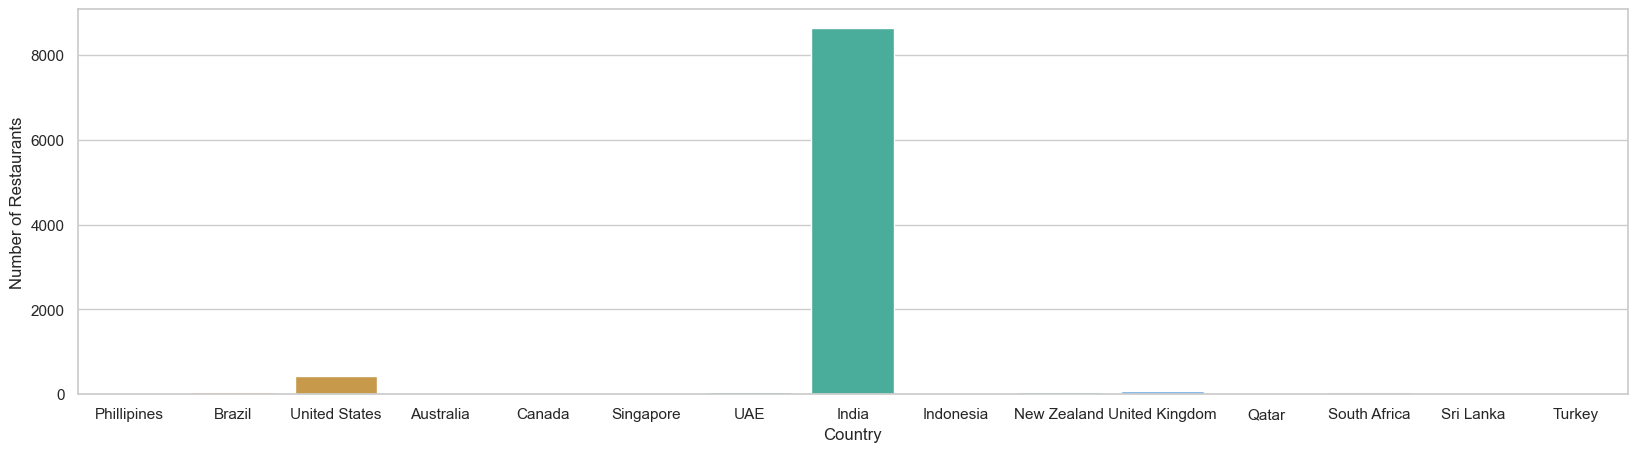

In [33]:
# Univariate analysis using count plot
plt.figure(figsize = (20, 5))
sns.countplot(df['Country']) 
plt.ylabel('Number of Restaurants')
plt.show()

### Observations:
Countplot for 'Country' shows the number of restaurants in each specific country. 'India' has the highest representation, with 8,652 restaurants, followed by 'United States' with 434 restaurants and 'United Kingdom' with 80 restaurants, among others.

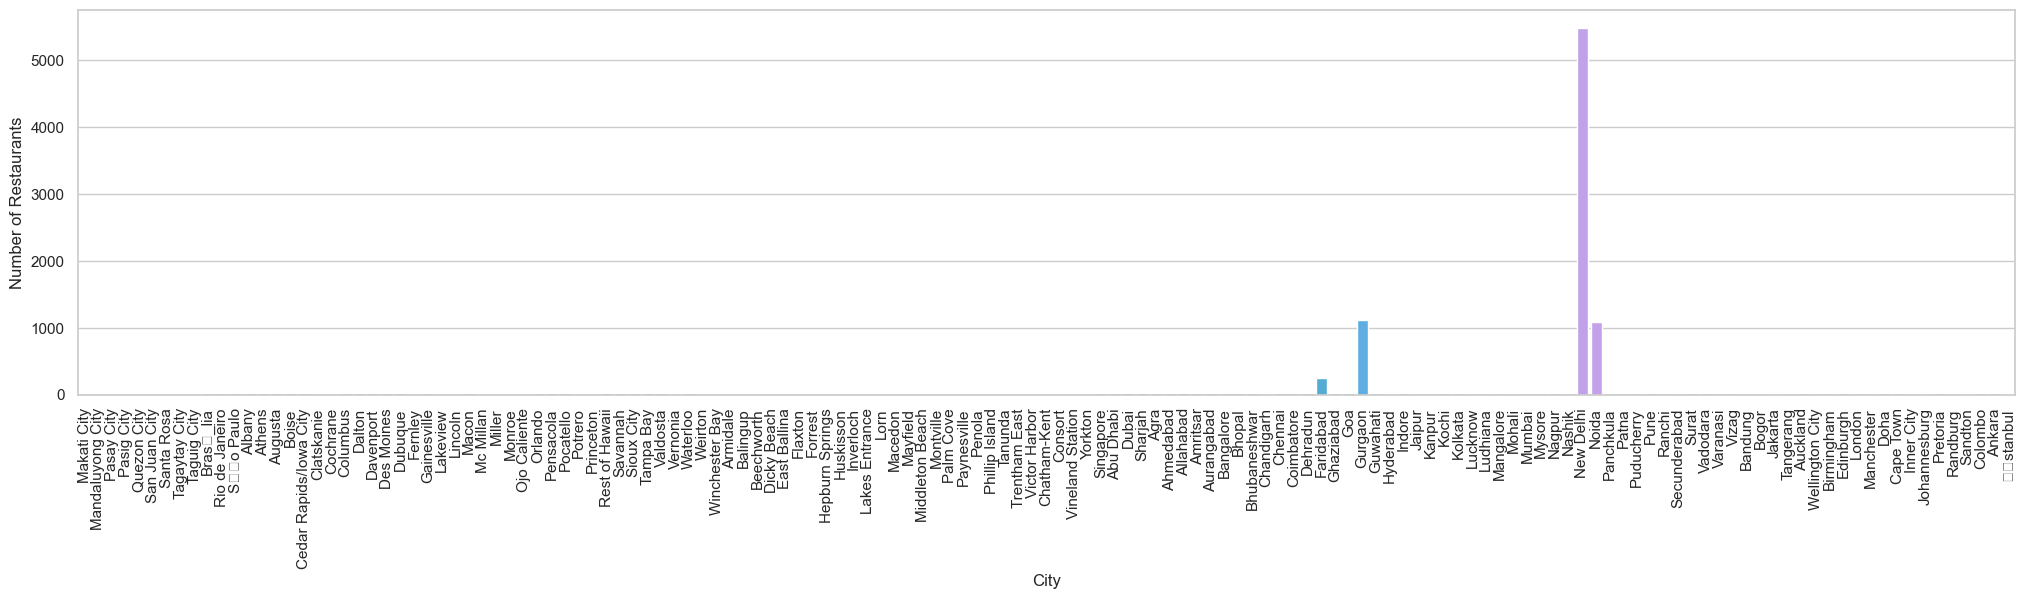

In [34]:
# Univariate analysis using count plot
plt.figure(figsize = (25, 5))
sns.countplot(df['City']) 
plt.xticks(rotation = 90)
plt.ylabel("Number of Restaurants")
plt.show()

### Observations:
Countplot for 'City' shows the number of restaurants located in various cities. 'New Delhi' stands out as the most common city, housing 5,473 restaurants. Following 'New Delhi' are 'Gurgaon' with 1,118 restaurants, 'Noida' with 1,080 restaurants, 'Faridabad' with 251 restaurants, and 'Ghaziabad' with 25 restaurants, among others.

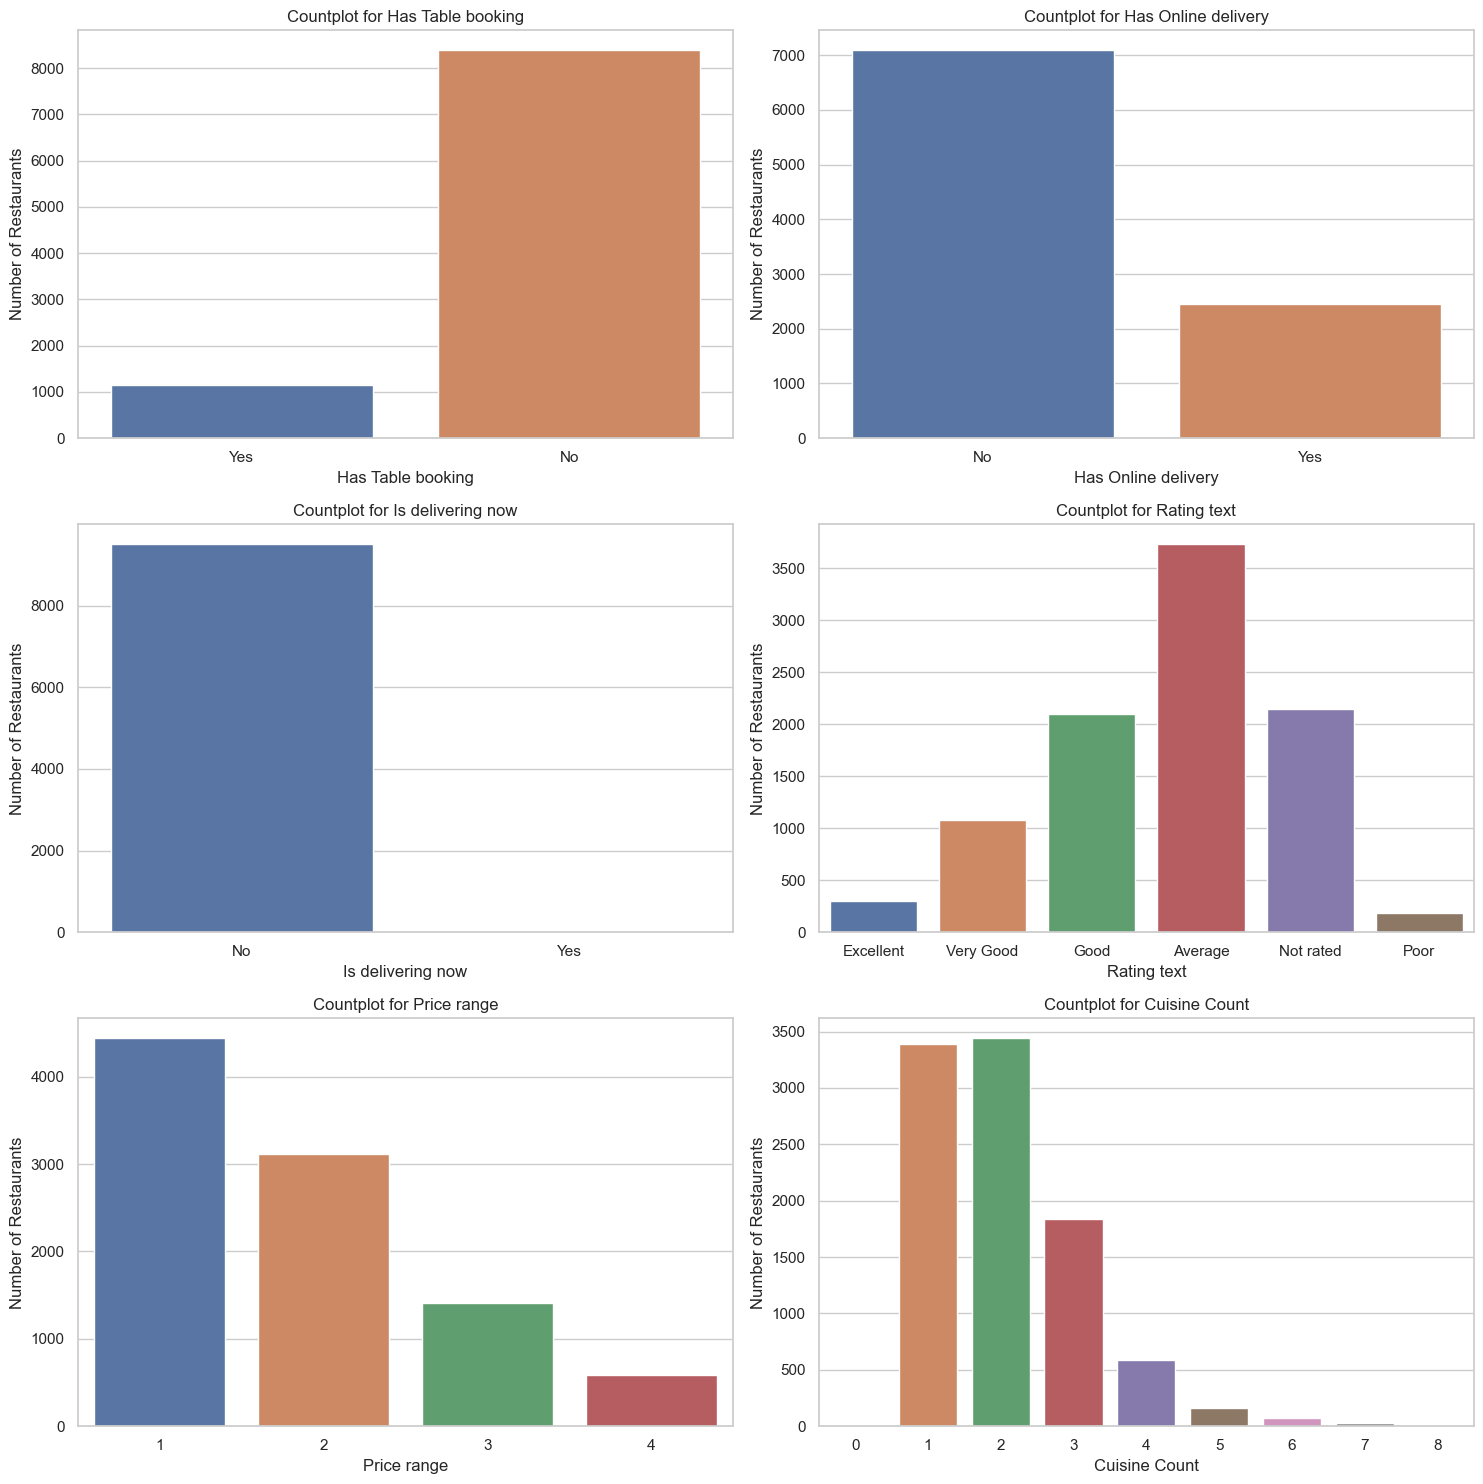

In [35]:
# Univariate analysis using count plot
columns_to_plot = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text', 'Price range', 
                   'Cuisine Count']
rows = 3
columns = 2
plt.figure(figsize = (15, 15))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.ylabel("Number of Restaurants")
    plt.tight_layout()

plt.show()

### Observations:

#### Has Table Booking
The count plot for 'Has Table Booking' indicated that the distribution of restaurants offering the option to reserve a table in advance. The more common choice is 'No,' which appears 8,393 times in the dataset.

#### Has Online Delivery
The count plot for 'Has Online Delivery' indicates that the most restaurants do not provide online delivery services. 'No' is the more common choice, with 7,100 occurrences.

####  Is Delivering Now
The count plot for 'Is Delivering Now' indicates that the majority of restaurants in the dataset are not currently delivering food. The 'No' category is more prevalent, appearing 9,517 times.

#### Rating Text
The count plot for 'Rating Text' indicates that 'Average' is the most frequently used rating text, with 3,737 occurrences.

#### Price range
The count plot for 'Price Range' indicates that the distribution of restaurant pricing categories. The most common range is '1', which appears 4,444 times in the dataset. Following '2' with 3,113 occurrences and '3' with 1,408 occurrences.

#### Cuisine Count
The count plot for 'Cuisine Count' indicates that '2' is the most common count, occurring 3,444 times, followed by '1' (3,394 times) and '3' (1,840 times).

### Pie Chart

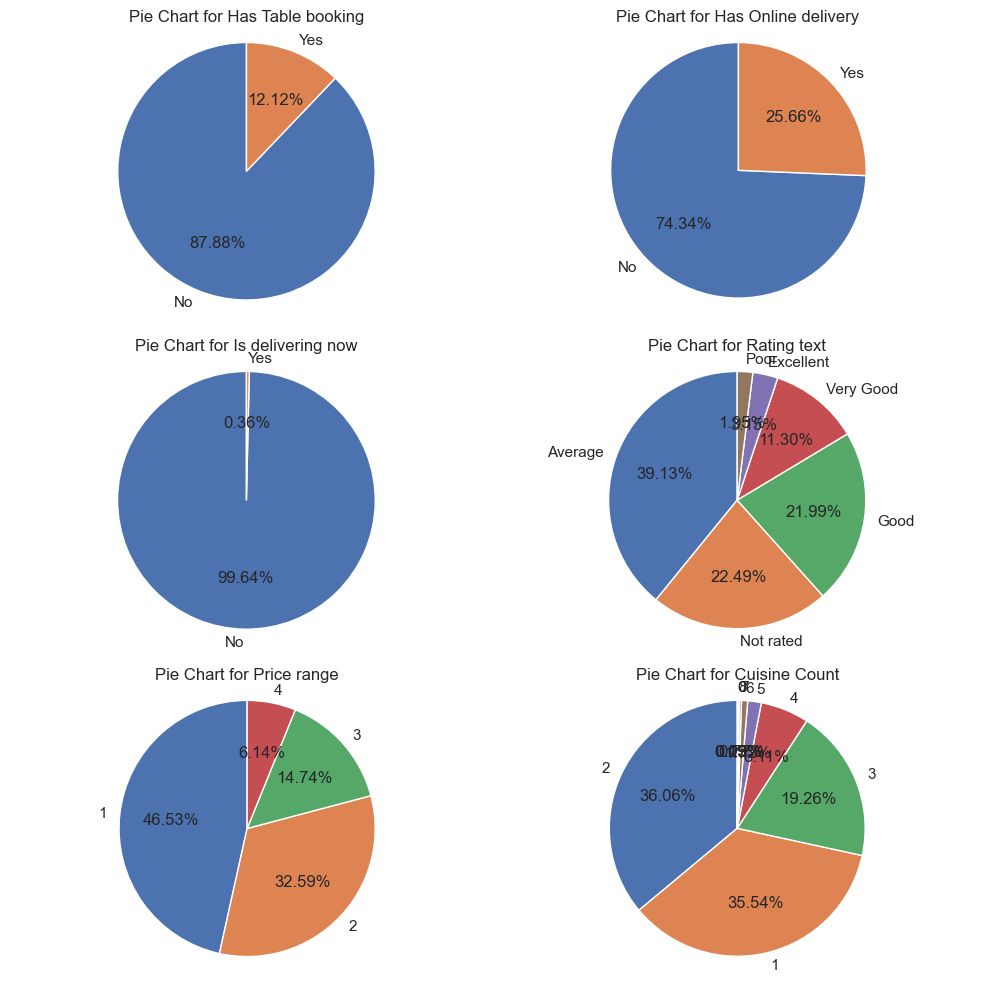

In [36]:
# Univariate analysis using pie chart
columns_to_plot = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text', 'Price range', 
                   'Cuisine Count']
rows = 3
columns = 2
plt.figure(figsize = (10, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    category_counts = df[columns_to_plot[i]].value_counts()
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.2f%%', startangle = 90)
    plt.title("Pie Chart for " + columns_to_plot[i])
    plt.axis('equal')
plt.tight_layout()
plt.show()

### Observations: 
#### Has Table Booking
Approximately 87.88% of restaurants do not offer table booking ('No'), while 12.12% do offer this service ('Yes').

#### Has Online Delivery
Within the dataset, about 74.34% of restaurants do not provide online delivery ('No'), while 25.66% do offer this service ('Yes').

#### Percentages for Is Delivering Now
A significant majority, approximately 99.64% of restaurants, are not currently delivering food ('No'), while only 0.36% are actively delivering ('Yes').

#### Rating Text
The distribution of restaurant ratings is as follows: 'Average' ratings constitute 39.13%, 'Not rated' is at 22.49%, 'Good' makes up 21.99%, 'Very Good' represents 11.30%, 'Excellent' is at 3.15%, and 'Poor' accounts for 1.95%.

#### Price Range
Among the restaurants, 46.53% fall under 'Price range 1', 32.59% belong to 'Price range 2', 14.74% are categorized as 'Price range 3', and 6.14% are in 'Price range 4'.

#### Cuisine Count
The distribution of the number of cuisines offered by restaurants is as follows: '2' is the most common, representing 36.06%, followed by '1' at 35.54%, '3' at 19.26%, '4' at 6.11%, '5' at 1.72%, '6' at 0.77%, '7' at 0.29%, '8' at 0.15%, and '0' at 0.09%.

### Histogram

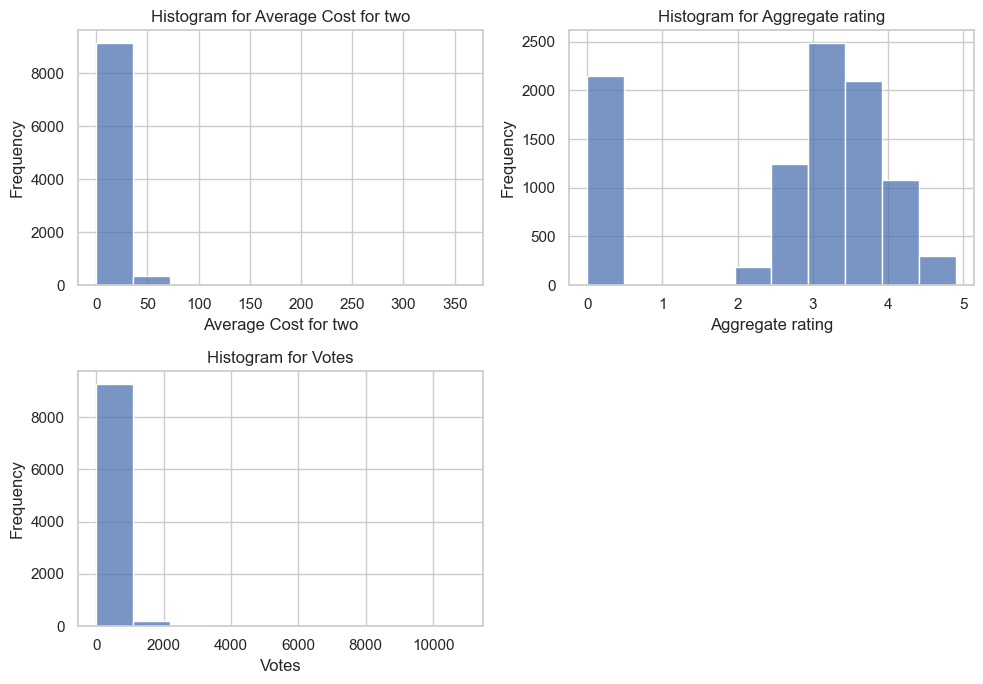

In [37]:
# Univariate analysis using histogram
columns_to_plot = ['Average Cost for two', 'Aggregate rating', 'Votes']
rows = 2
columns = 2

plt.figure(figsize = (10, 7))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Observations:

#### Average Cost for Two
The histogram for column 'Average Cost for Two' displays a diverse range of dining expenses, with some notable variations in costs. While the majority of entries fall within a certain price range, there are high-cost outliers present in the data.

#### Aggregate rating
The histogram for 'Aggregate Rating' column displays there is variation in the quality ratings of the establishments. The majority of ratings fall within a certain range, but there are also establishments with significantly higher and lower ratings.

#### Votes
The histogram for 'Votes' column displays differences in the popularity and engagement levels of the listed restaurants. There is a wide range of vote counts, with some restaurants having very high engagement while others have received few or no votes.

### Violin Plot

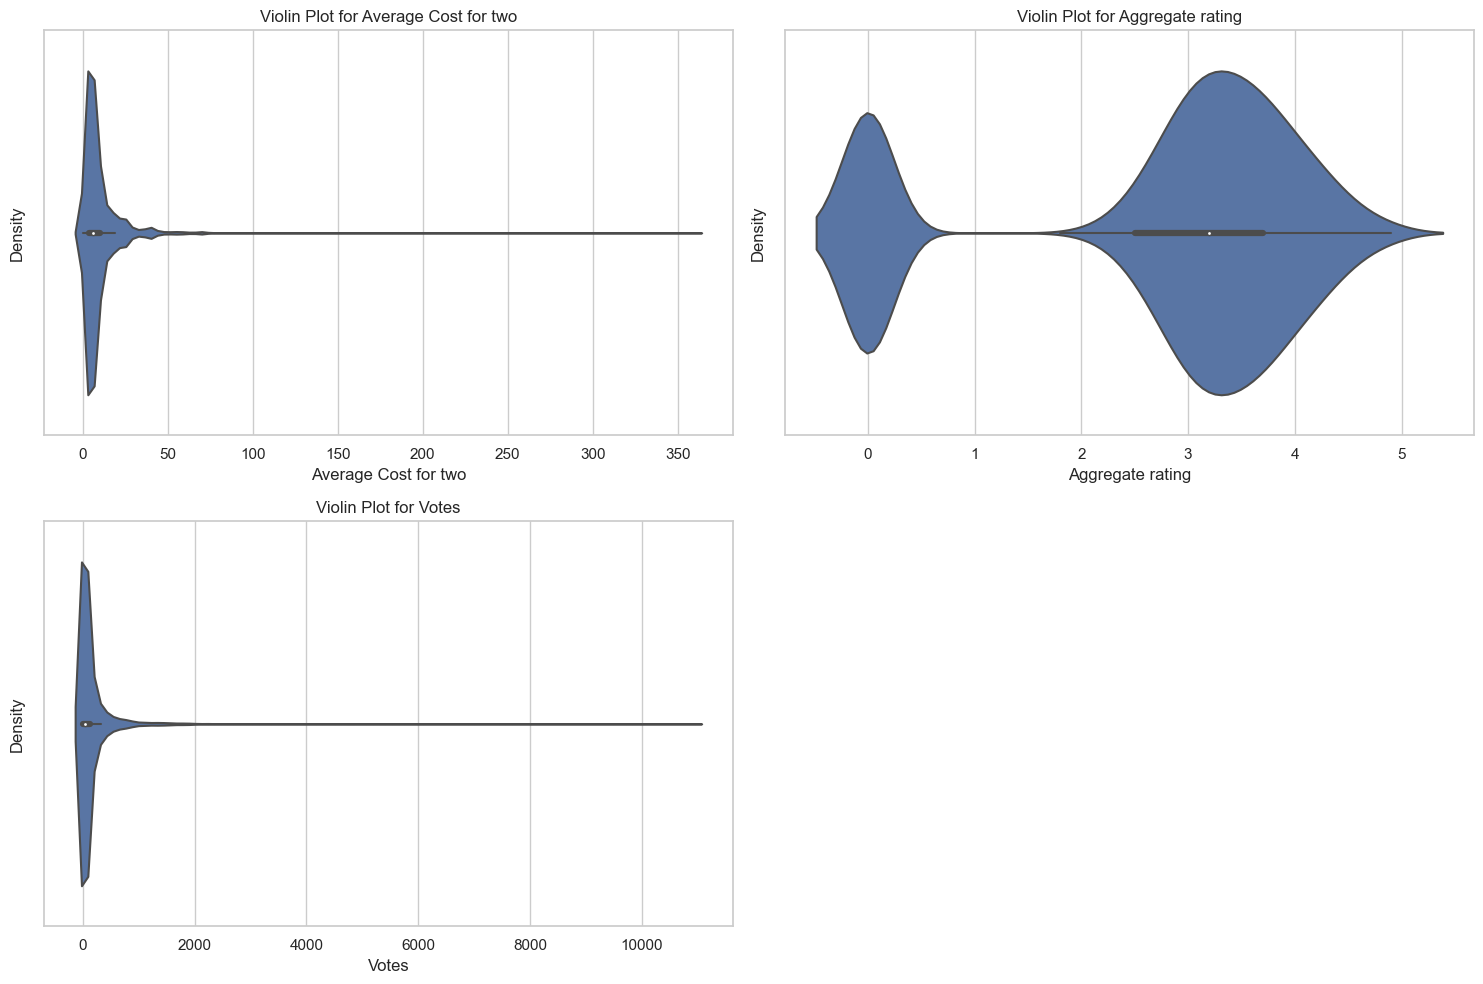

In [38]:
# Univariate analysis using violin plot

# Columns to plot
columns_to_plot = ['Average Cost for two', 'Aggregate rating', 'Votes']

# Define the number of rows and columns for subplots
rows = 2
columns = 2

# Create a figure with the specified size
plt.figure(figsize = (15, 10))

# Loop through the columns and create violin plots
for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.violinplot(x=df[columns_to_plot[i]])
    plt.title("Violin Plot for " + columns_to_plot[i])
    plt.xlabel(columns_to_plot[i])
    plt.ylabel("Density")
    plt.tight_layout()

plt.show()

### Observations:

#### Average Cost for Two
The violin plot for 'Average Cost for Two' reveals a broad range of dining expenses, with noticeable variations and high-cost outliers.

#### Aggregate rating
In the 'Aggregate Rating' violin plot, there's a concentration of ratings within a specific range, but also notable variations with establishments having significantly higher or lower ratings.

#### Votes
The 'Votes' violin plot illustrates a wide range of vote counts, with some restaurants enjoying high engagement, while others have received very few or no votes.

## Bivariate Analysis

### Count Plot

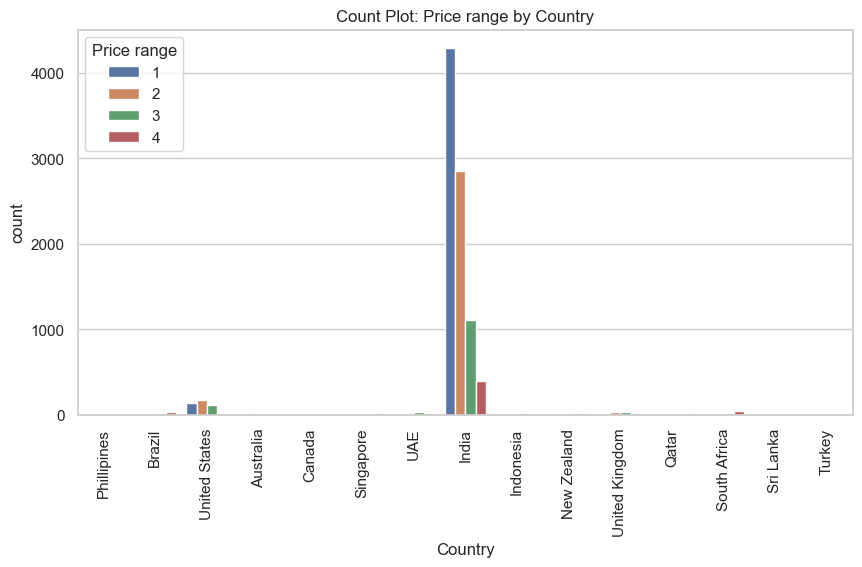

In [39]:
# Bivariate analysis using count plot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Country', hue = 'Price range', data = df)
plt.title("Count Plot: Price range by Country")
plt.xticks(rotation = 90)
plt.show()

### Observations:

#### Price range by Country
The count plot for ;Price range' by 'Country' reveals that the price range distributions vary by country. Most countries have a diverse range of restaurants, with the second and third price range categories being the most common. India has a significant presence in the first and second price range categories, reflecting a broad spectrum of restaurants

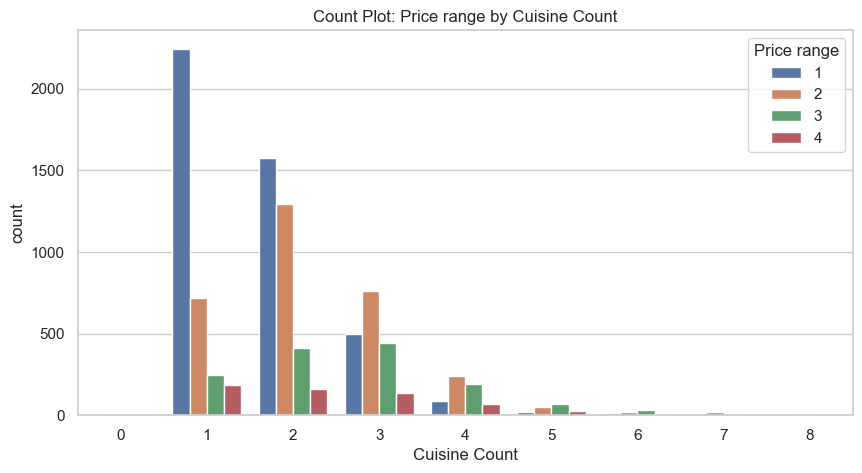

In [40]:
# Bivariate analysis using count plot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Cuisine Count', hue = 'Price range', data = df)
plt.title("Count Plot: Price range by Cuisine Count")
plt.show()

### Observations:

#### Price range by Cuisine Count
The count plot for 'Price range' by 'Cuisine Count' reveals that restaurants offering a single cuisine are most common, especially in price range 1 and 2. As the number of cuisines offered increases, the total number of restaurants decreases, but they are still spread across all price ranges. The dataset has limited representation of restaurants with Cuisine Count 0 and 8, indicating specialization in a single cuisine or a broad range of cuisines is less common. Price ranges 1 and 2 have the highest restaurant counts, while price ranges 3 and 4 are less common.

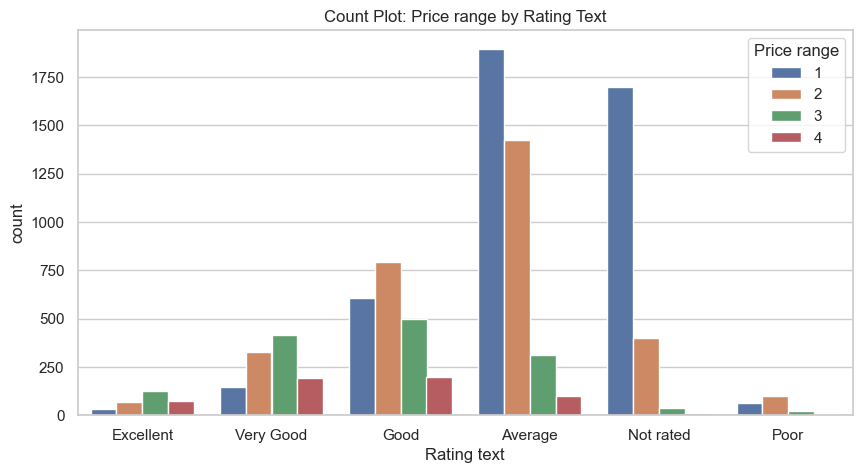

In [41]:
# Bivariate analysis using count plot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Rating text', hue = 'Price range', data = df)
plt.title("Count Plot: Price range by Rating Text")
plt.show()

### Observations:

#### Price range by Rating text
The count plot for 'Price range' by 'Rating text' reveals that 'Average' and 'Good' rated restaurants are the most common across all price ranges. 'Not rated' restaurants are prevalent, especially in price range 1. Higher rated restaurants like 'Excellent' and 'Very Good' are less common but are often found in price ranges 2 and 3. Price ranges 1 and 2 have more restaurants compared to price ranges 3 and 4, indicating a higher prevalence of budget-friendly and mid-range dining options. The data reflects a diverse range of restaurant ratings and pricing options, offering varied dining experiences.

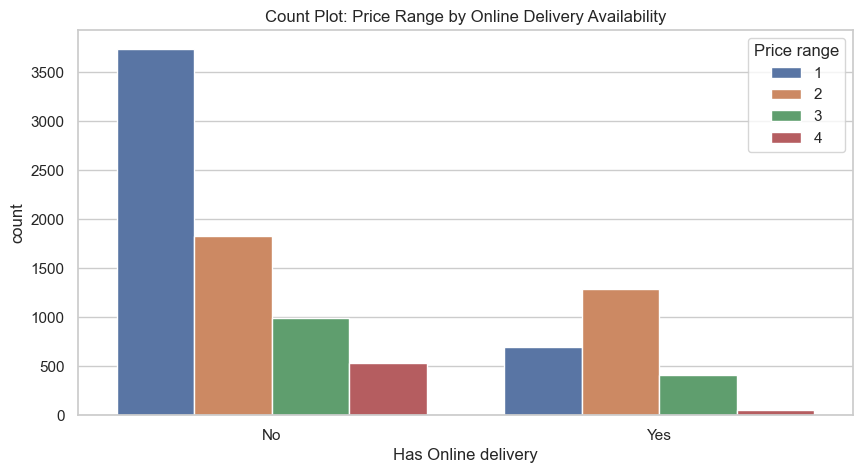

In [42]:
# Bivariate analysis using count plot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Has Online delivery', hue = 'Price range', data = df)
plt.title("Count Plot: Price Range by Online Delivery Availability")
plt.show()

### Observations:

#### Price Range by Online delivery availability
The count plot for 'Price range' by 'Online delivery availability' reveals that the most restaurants do not offer online delivery services, regardless of the price range. Price range 2 has the highest number of restaurants offering online delivery, catering to budget-conscious diners.
As price range increases, the availability of online delivery decreases, with the fewest options in price range 4.

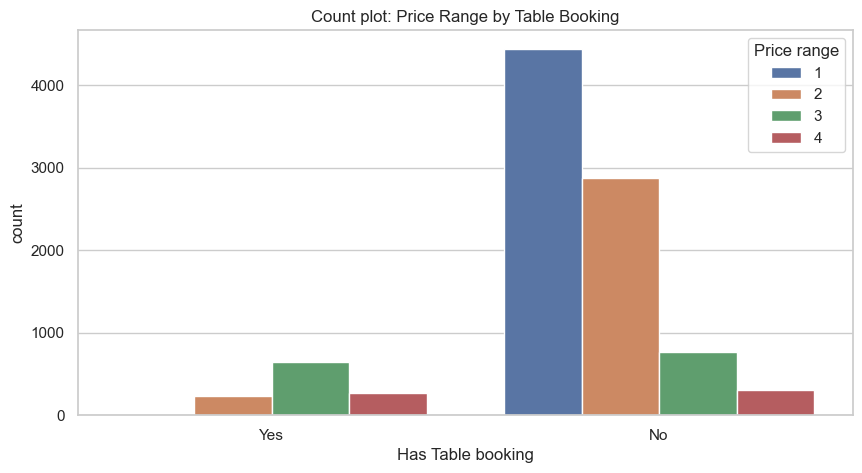

In [43]:
# Bivariate analysis using count plot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Has Table booking', hue = 'Price range', data = df)
plt.title("Count plot: Price Range by Table Booking")
plt.show()

### Observations:

#### Price Range by Has Table booking
The count plot for 'Price range' by 'Has Table booking' reveals that the most restaurants, regardless of price range, do not offer table booking services. Price range 3 has the highest number of restaurants offering table booking, possibly to enhance the dining experience. Higher-priced restaurants are less likely to offer table booking, with the fewest options in price range 1. This suggests that lower-priced restaurants may prioritize this service.

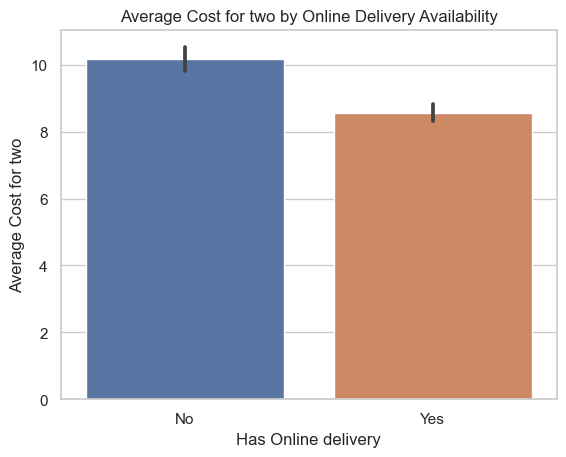

In [44]:
# Bivariate analysis using bar plot
sns.barplot(x = 'Has Online delivery', y = 'Average Cost for two', data = df)
plt.title("Average Cost for two by Online Delivery Availability")
plt.show()

### Observations:
#### Has Online delivery vs Average Cost for two
The cost for two people when using online delivery services is influenced by factors such as convenience fees, menu choices, delivery apps, comparison shopping, eating habits, location, and special offers. These factors can impact the overall cost, with some leading to cost savings and others increasing expenses.

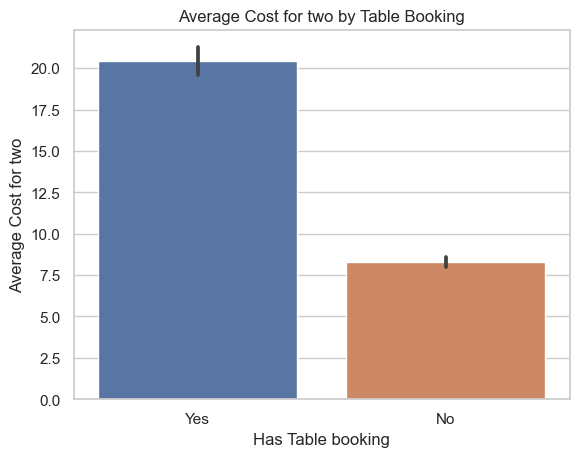

In [45]:
# Bivariate analysis using bar plot
sns.barplot(x = 'Has Table booking', y = 'Average Cost for two', data = df)
plt.title("Average Cost for two by Table Booking")
plt.show()

### Observations:
#### Has Table booking vs Average Cost for two
The presence of table booking at a restaurant can influence the average cost for two people by offering a more controlled and potentially upscale dining experience, which may impact the overall expense, especially for special occasions.

### Scatter Plot

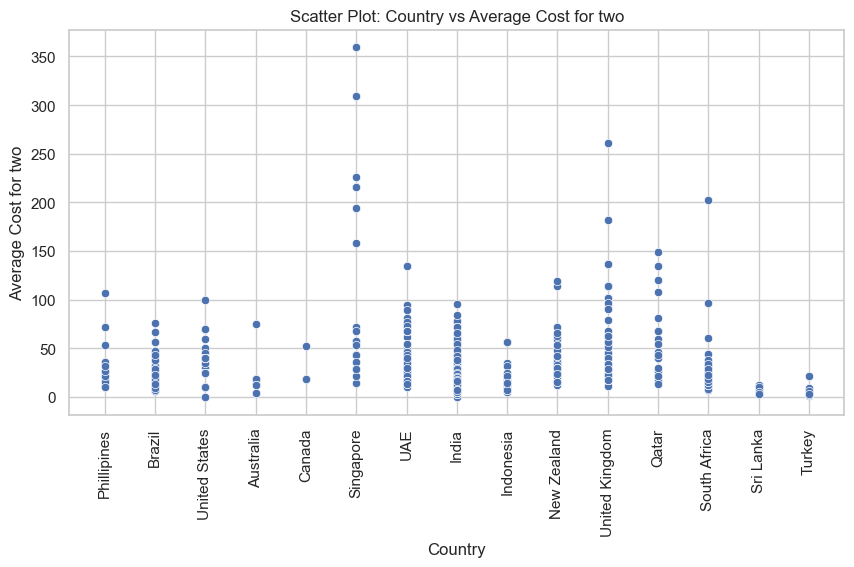

In [46]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Country' , y = 'Average Cost for two', data = df)
plt.title("Scatter Plot: Country vs Average Cost for two")
plt.xticks(rotation = 90)
plt.show()

### Observations:

#### Country vs Average Cost for two
The scatter plot for 'Country' vs 'Average Cost for two' shows a good relationship between the 'Country' and the 'Average Cost for Two'. As we move along the x-axis (Country), there is a general upward trend in the y-axis (Average Cost for Two). 

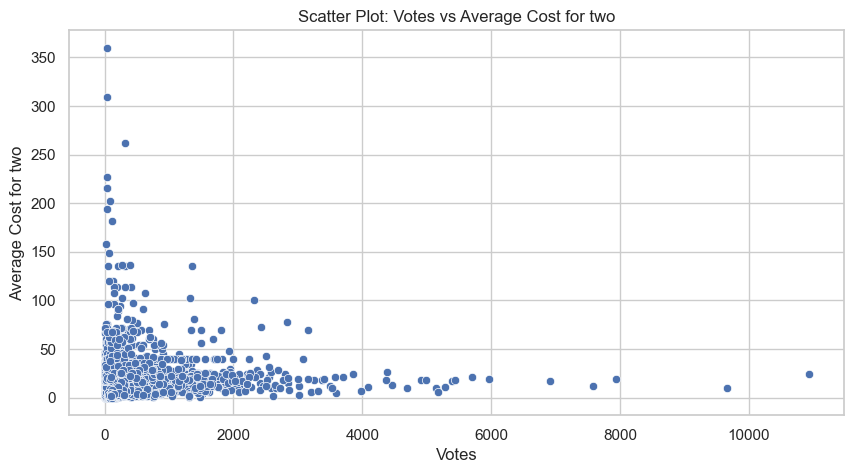

In [47]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Votes' , y = 'Average Cost for two', data = df)
plt.title("Scatter Plot: Votes vs Average Cost for two")
plt.show()


### Observations:

#### Votes vs Average Cost for two
The scatter plot for 'Votes' vs 'Average Cost for two' shows a weak relationship  between the number of votes a restaurant receives and its average cost for two people. This suggests that more popular restaurants tend to have slightly higher average costs, but the relationship is not very strong. Other factors also influence dining expenses.

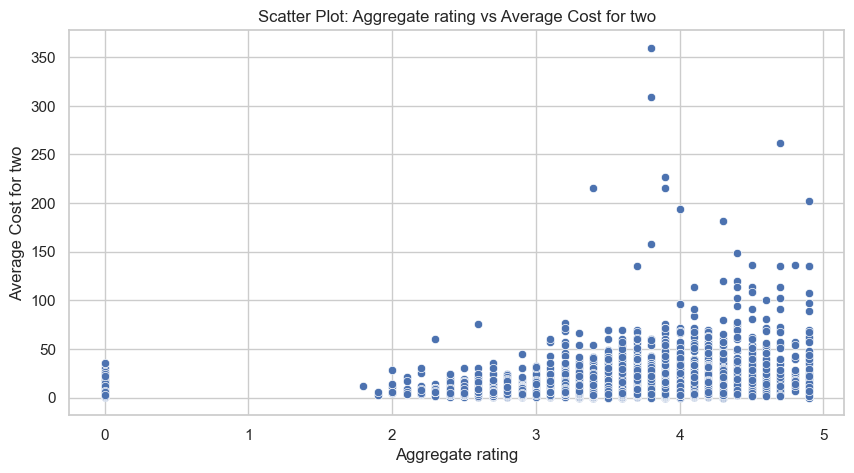

In [48]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Aggregate rating', y = 'Average Cost for two', data = df)
plt.title("Scatter Plot: Aggregate rating vs Average Cost for two")
plt.show()

### Observations:

#### Aggregate rating vs Average Cost for two
The scatter plot for 'Aggregate rating' vs 'Average Cost for two' shows a moderate relationship between a restaurant's aggregate rating and its average cost for two people. This suggests that restaurants with higher ratings tend to have slightly higher average dining costs.

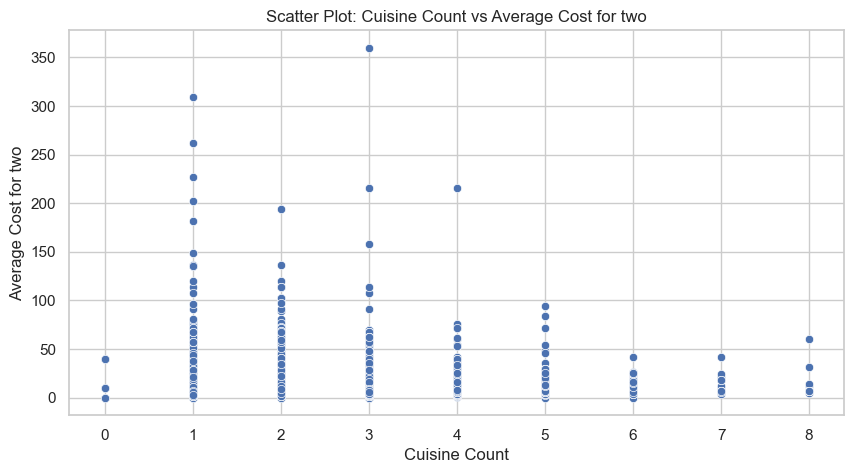

In [49]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Cuisine Count' , y = 'Average Cost for two', data = df)
plt.title("Scatter Plot: Cuisine Count vs Average Cost for two")
plt.show()

### Observations:

#### Cuisine Count vs Average Cost for two
The scatter plot for 'Cuisine Count' vs 'Average Cost for two' highlights an intriguing relationship between the number of cuisines offered by a restaurant and the corresponding average cost for two people. Notably, as the cuisine count increases, there appears to be a trend of lower average costs for two people. Conversely, restaurants offering fewer cuisines tend to exhibit higher average costs for two people.

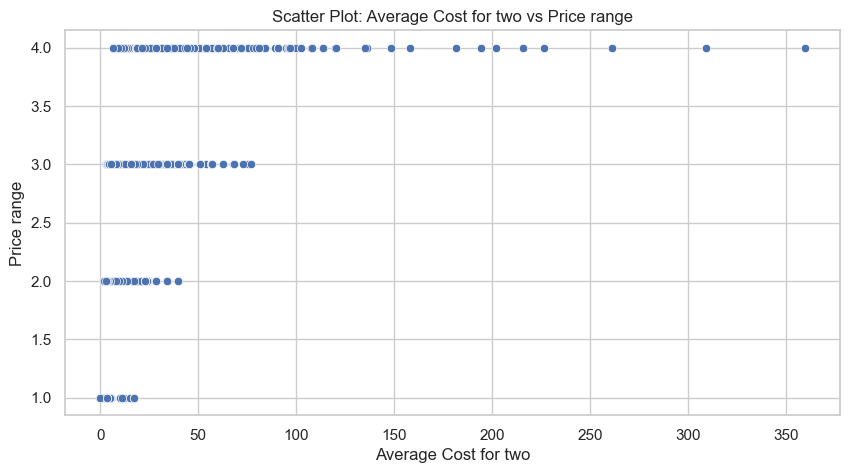

In [50]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Average Cost for two' , y = 'Price range', data = df)
plt.title("Scatter Plot: Average Cost for two vs Price range")
plt.show()

### Observations:

#### Average Cost for two vs Price range
The scatter plot for 'Average Cost for two' vs 'Price Range' shows a good relationship between a restaurant's price range and the average cost for two people. This indicates that restaurants in higher price ranges tend to have significantly higher dining expenses.

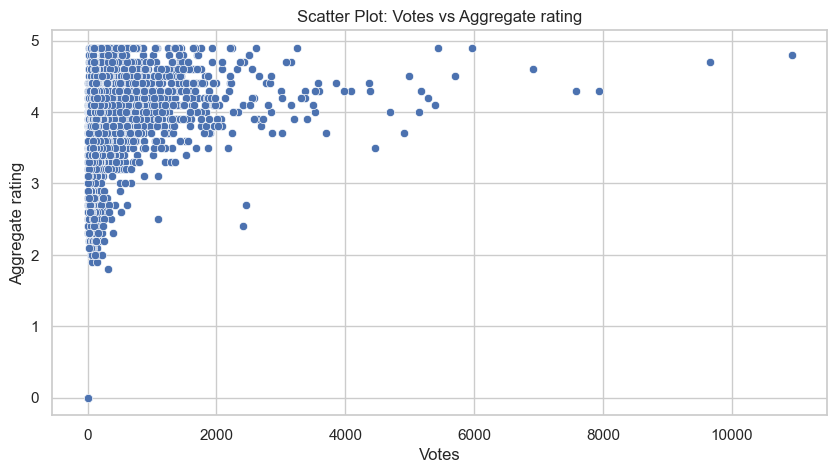

In [51]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Votes' , y = 'Aggregate rating', data = df)
plt.title("Scatter Plot: Votes vs Aggregate rating")
plt.show()

### Observations:

#### Votes vs Aggregate rating
The scatter plot for 'Votes' vs 'Aggregate rating' shows a goog relationship between the number of votes received by a restaurant and its aggregate rating. This indicates that more popular restaurants, with a higher number of votes, tend to have better aggregate ratings, although other factors also play a role in determining a restaurant's rating.

### Line Plot

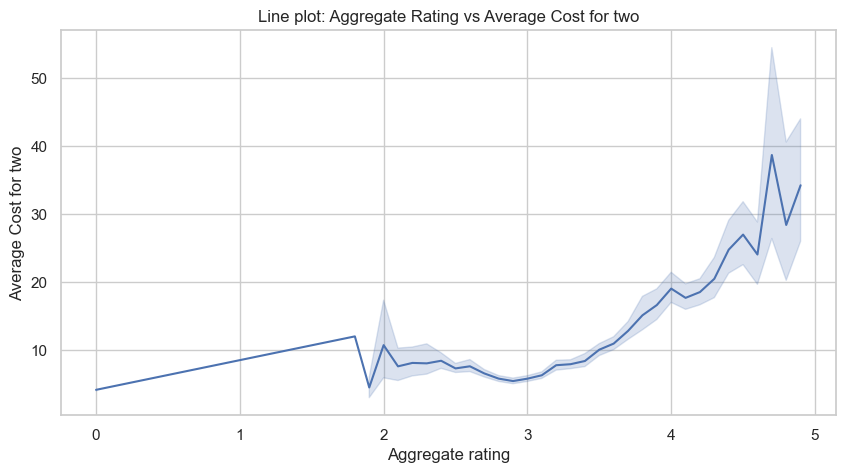

In [52]:
# Bivariate analysis using line plot
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Aggregate rating', y = 'Average Cost for two', data = df)
plt.title("Line plot: Aggregate Rating vs Average Cost for two")
plt.show()

### Observations:

#### Votes vs Aggregate rating
The line plot for 'Aggregate rating' vs 'Average Cost for two' llustrates that restaurants with higher aggregate ratings tend to have moderately higher average dining costs. This relationship implies that perceived quality, as reflected in the rating, is associated with slightly elevated dining expenses.

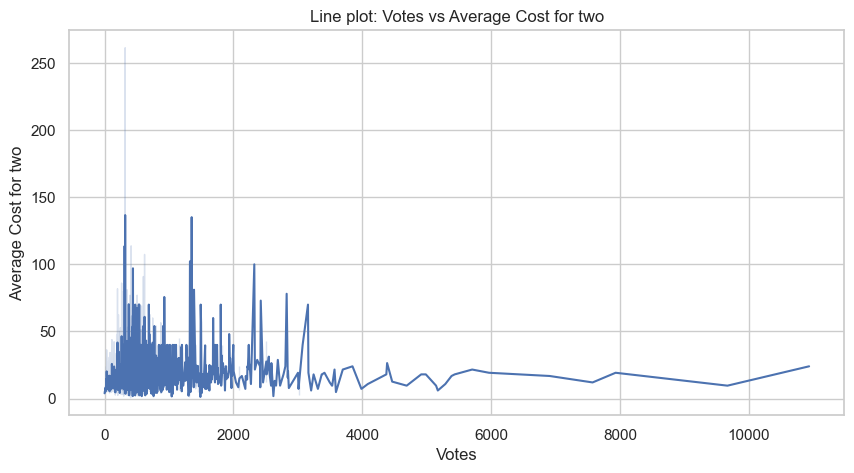

In [53]:
# Bivariate analysis using line plot
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Votes', y = 'Average Cost for two', data = df)
plt.title("Line plot: Votes vs Average Cost for two")
plt.show()

### Observations:

#### Votes vs Average Cost for two
The line plot for 'Votes' vs 'Average Cost for two' shows a weak relationship  between the number of votes a restaurant receives and its average cost for two people. This suggests that more popular restaurants tend to have slightly higher average costs, but the relationship is not very strong. Other factors also influence dining expenses.

### Pair Plot

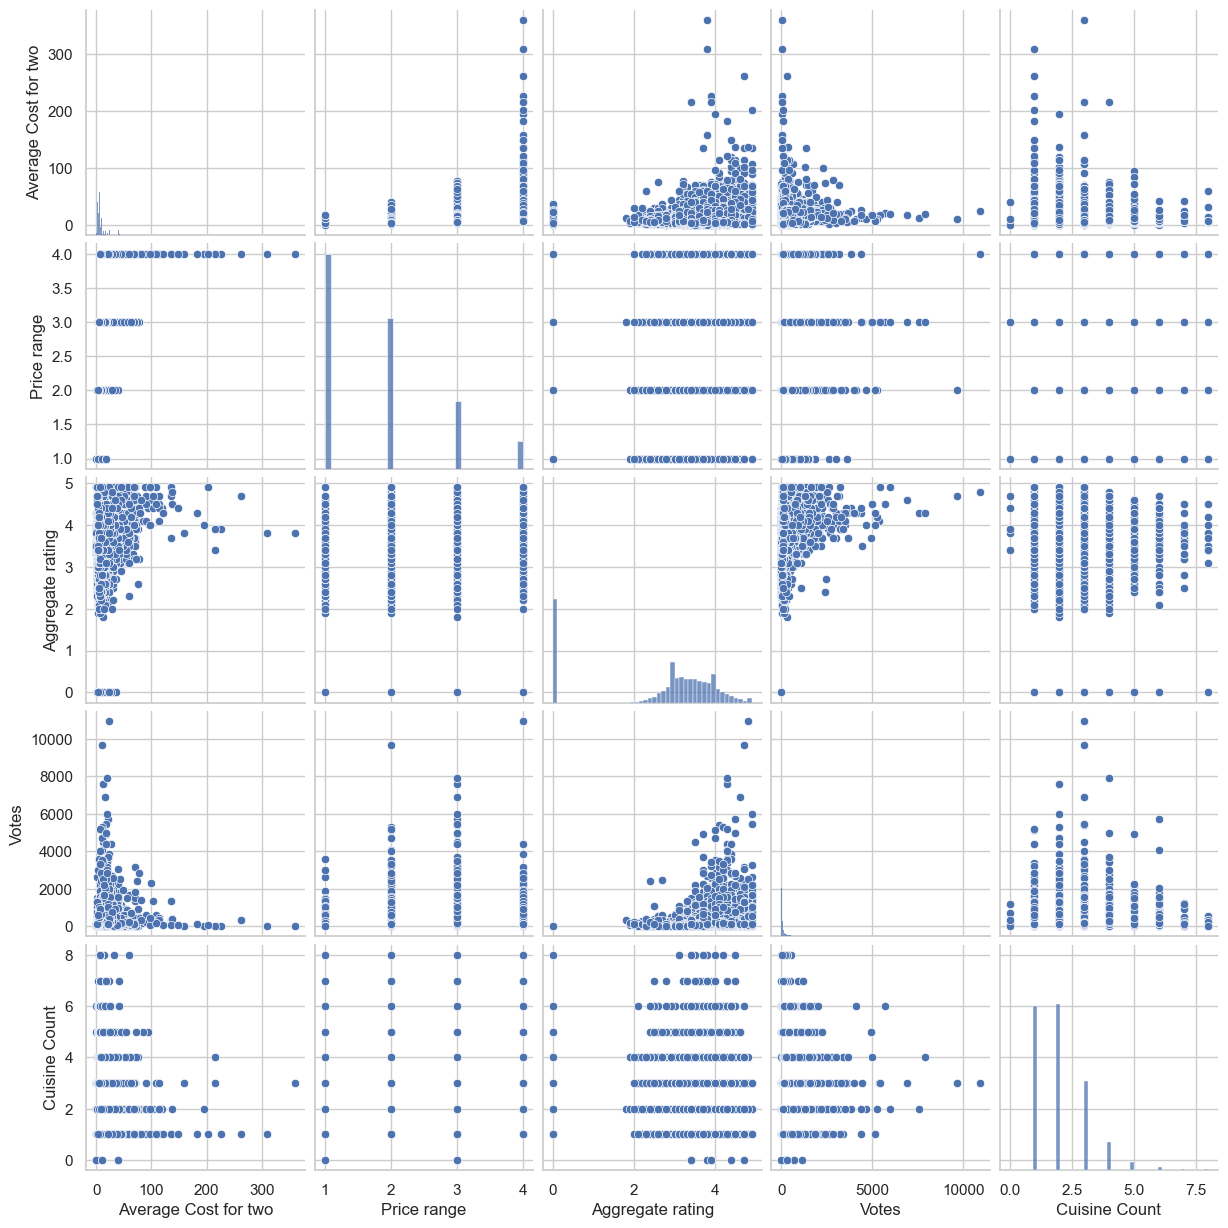

In [54]:
# Bivariate analysis using pairplot
columns_to_plot = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'Cuisine Count']
sns.pairplot(df[columns_to_plot])
plt.show()

### Observations:

The pair plot shows the relationships between diffrent columns within the restaurant dataset. 'Average Cost for two' and 'Price range' exhibit a good relationship, emphasizing the link between pricing and dining expenses. Additionally, 'Aggregate rating' also shares good relationship with both 'Price range' and 'Votes', suggesting that higher-priced restaurants tend to receive better ratings and more votes. Furthermore, 'Aggregate rating' has good relationship with 'Average Cost for two', indicating that better-rated restaurants often have slightly higher dining costs. The relationship between 'Price range' and 'Cuisine Count' is also good, implying that restaurants offering a broader range of cuisines are typically found in higher price ranges. 

## Multivariate Analysis

### Scatter Plot

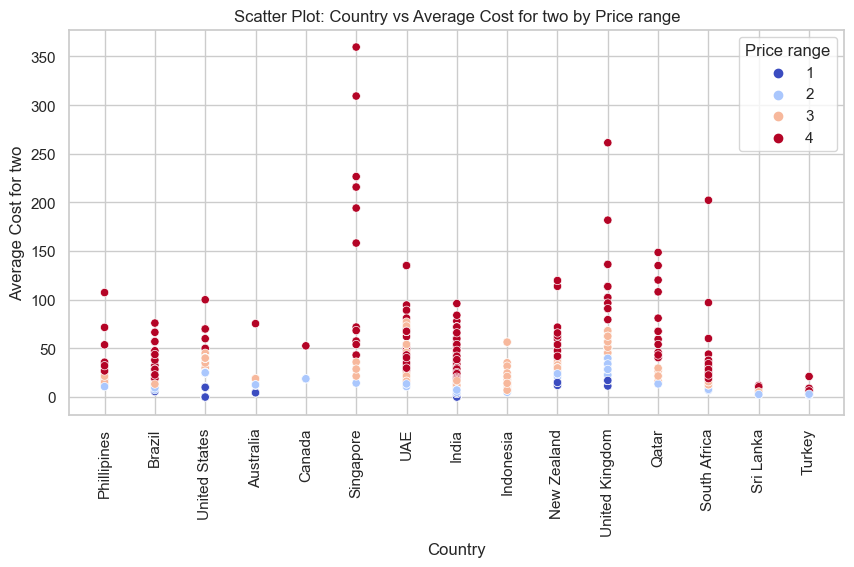

In [55]:
# Multivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Country', y = 'Average Cost for two', hue = 'Price range', data = df, palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.title("Scatter Plot: Country vs Average Cost for two by Price range")
plt.show()

### Observations:

#### Country vs Average Cost for two by Price range
The scatter plot for 'Country' vs 'Average Cost for two' by 'Price range' shows a diverse range of dining options across distinct price ranges in different countries. Notably, the price range 4, appears as the most common category, signifying the presence of a considerable selection of high-end dining establishments, likely providing more exclusive and luxurious dining experiences. Furthermore, price Range 3 is also prominent, suggesting a substantial number of restaurants that offer high pricing. In contrast, price range 1 and price range 2 represent more budget-friendly dining options, although they are somewhat less prevalent. 

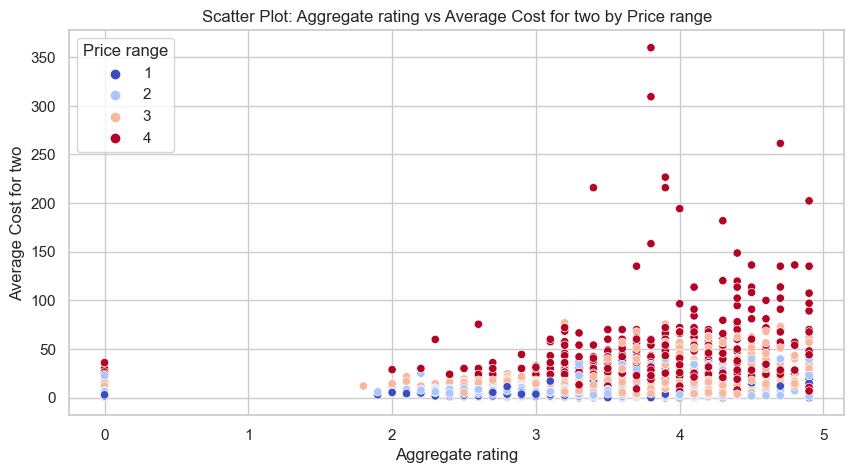

In [56]:
# Multivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Aggregate rating', y = 'Average Cost for two', hue = 'Price range',data = df, palette = 'coolwarm')
plt.title("Scatter Plot: Aggregate rating vs Average Cost for two by Price range")
plt.show()

### Observations:

#### Aggregate rating vs Average Cost for two by Price range
The scatter plot for 'Aggregate rating' vs 'Average Cost for two' by 'Price range' shows a diverse range of dining options across distinct price ranges. Price range 4 stands out as the most common category with a considerable count, signifying a substantial selection of high-end dining establishments, likely providing more exclusive and luxurious dining experiences with excellent ratigs. Price range 3 is second most commom category, indicating a significant presence of restaurants with moderate pricing, possibly offering a balanced dining experience with good rating. In contrast, price ranges 1 and 2 denote more budget-friendly dining options, although they are somewhat less abundant in comparison.

# Label Encoding

In [57]:
# Converting categorical columns into numerical columns
# List of categorical columns
categorical_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Country', 'City', 'Locality']
encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = encoder.fit_transform(df[i])

In [58]:
number_mapping = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Not rated': 1,
    'Poor': 0
}

# Use the mapping to create a new 'Rating Color Code' column
df['Ratings'] = df['Rating text'].map(number_mapping)

In [59]:
# Dropping 'Rating text' column from dataset
df.drop('Rating text', axis = 1, inplace = True)

In [60]:
# Display shape of dataframe after dropping 'Rating text' column
df.shape

(9551, 12)

Now, dataset has 9551 and 12 columns.

In [61]:
# Display dataset after updation
df.head()

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,73,171,19.688563,1,0,0,3,4.8,314,6,3,5
1,73,593,21.478432,1,0,0,3,4.5,591,6,1,5
2,75,308,71.594774,1,0,0,4,4.4,270,6,4,4
3,75,862,26.848040,0,0,0,4,4.9,365,6,2,5
4,75,862,26.848040,1,0,0,4,4.8,229,6,2,5


## Storing this dataset separately for building machine learning models for predicting 'Average Cost of Food for Two People' and 'Range of Price of Food'

In [62]:
# For regression task
df_r = df.copy()

# For classification task
df_c = df.copy()

# Building model for predicting 'Average Cost of Food for Two People'

## Features and Target variable for Predicting 'Average Cost of Food for Two People' :

### Features: 
Country, City, Locality, Has Table booking, Has Online delivery, Is delivering now, Price range, Aggregate rating, Votes, Cuisine Count, Ratings

### Target variable:
Average Cost for two

In [63]:
# Display the dataset
df_r.head()

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,73,171,19.688563,1,0,0,3,4.8,314,6,3,5
1,73,593,21.478432,1,0,0,3,4.5,591,6,1,5
2,75,308,71.594774,1,0,0,4,4.4,270,6,4,4
3,75,862,26.848040,0,0,0,4,4.9,365,6,2,5
4,75,862,26.848040,1,0,0,4,4.8,229,6,2,5


## Checking for the outliers 

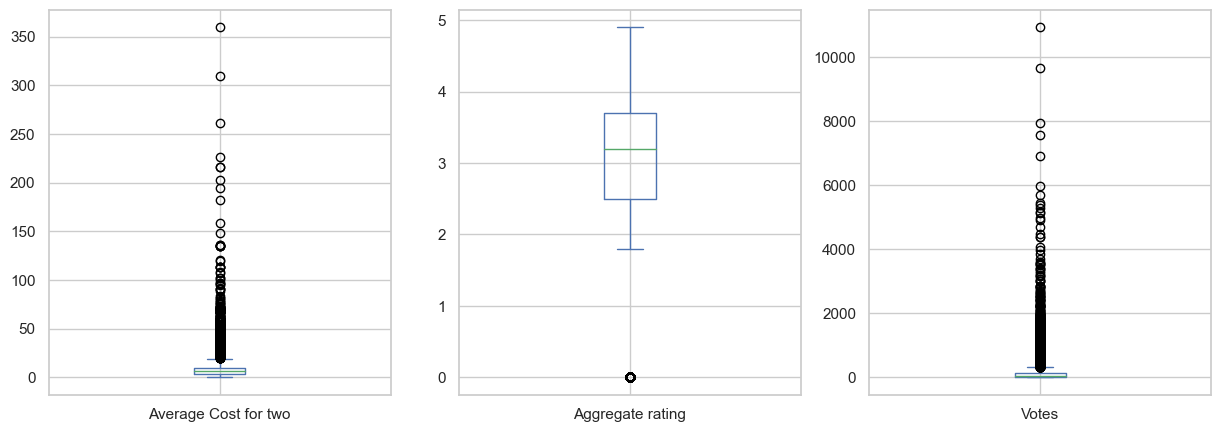

In [64]:
# Checking for the outliers using boxplot

# List of numerical columns
numerical_columns = ['Average Cost for two', 'Aggregate rating', 'Votes']

df_r[numerical_columns].plot(kind = 'box', subplots = True, figsize = (15, 5), layout = (1, 3))
plt.show()

### Observations:
Outliers are present in 'Average Cost for two', 'Aggregate rating', and 'Votes' columns but 'Average Cost for two' is target variable so it will not be considered for outliers removal.

In [65]:
# List of columns containing
columns_with_outliers = ['Aggregate rating', 'Votes']

In [66]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_r[columns_with_outliers]))
z_score

,Aggregate rating,Votes
0,1.407131,0.365202
1,1.209281,1.009168
2,1.143331,0.262911
3,1.473081,0.483766
4,1.407131,0.167595
...,...,...
9546,0.945480,1.467151
9547,1.011430,2.039049
9548,0.681680,1.171903
9549,0.879530,1.729853


In [67]:
# Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([ 102,  336,  341,  342,  343,  350,  352,  409,  429,  454,  458,
         468,  469,  470,  472,  585,  591,  600,  644,  726,  727,  728,
         731,  735,  736,  739,  743,  793,  805,  807,  811,  813,  814,
         815,  817,  821,  824, 1144, 1147, 1163, 1235, 1247, 1248, 1251,
        1252, 1253, 1255, 1256, 1258, 1464, 1554, 1555, 1839, 1861, 1866,
        2300, 2302, 2304, 2307, 2311, 2314, 2338, 2344, 2402, 2404, 2406,
        2409, 2410, 2411, 2412, 2413, 2414, 2416, 2480, 2483, 2484, 2485,
        2488, 2490, 2492, 2495, 2499, 2635, 2880, 3005, 3008, 3013, 3016,
        3018, 3025, 3026, 3028, 3033, 3041, 3049, 3055, 3056, 3057, 3060,
        3068, 3075, 3080, 3083, 3085, 3093, 3094, 3095, 3101, 3107, 3110,
        3112, 3115, 3116, 3117, 3118, 3119, 3316, 3319, 3336, 3337, 3338,
        3438, 3588, 3589, 3599, 3601, 3605, 3976, 3983, 3984, 3986, 3992,
        3993, 3994, 3998, 4087, 4162, 4178, 4320, 4386, 4638, 4639, 4649,
        4673, 5007, 5026, 6144, 6317, 

In [68]:
# Removing Outliers
z = 3
updated_df_r = df_r[(z_score < z).all(axis = 1)]
updated_df_r

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,73,171,19.688563,1,0,0,3,4.8,314,6,3,5
1,73,593,21.478432,1,0,0,3,4.5,591,6,1,5
2,75,308,71.594774,1,0,0,4,4.4,270,6,4,4
3,75,862,26.848040,0,0,0,4,4.9,365,6,2,5
4,75,862,26.848040,1,0,0,4,4.8,229,6,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,517,4.232804,0,0,0,3,4.1,788,11,1,4
9547,140,552,5.555556,0,0,0,3,4.2,1034,11,3,4
9548,140,554,8.994709,0,0,0,4,3.7,661,11,2,3
9549,140,554,6.349206,0,0,0,4,4.0,901,11,1,4


In [69]:
# Checking the shape of dataframe after removing the outliers
updated_df_r.shape

(9378, 12)

Now, dataset has 9378 rows and 12 columns.

## Checking for the skewness

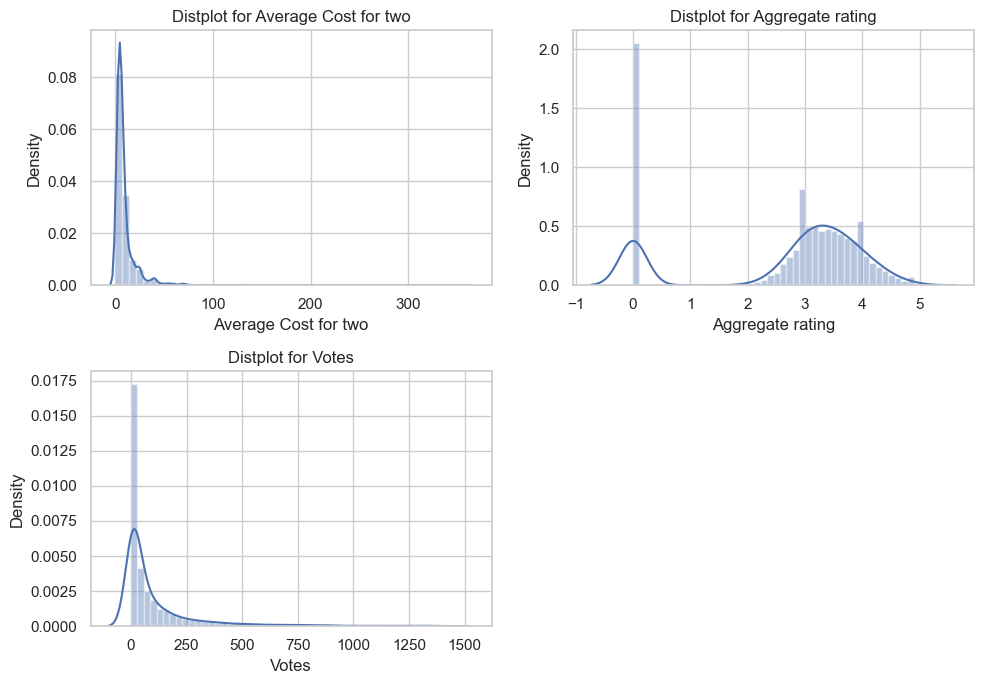

In [70]:
# Checking for the skewness using dist plot 
ncol = 2
nrow = 2
plt.figure(figsize = (10, 7))

for i in range(0, len(numerical_columns)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(updated_df_r[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

### Observations:

'Average Cost for two' appears to have a right-skewed distribution.

'Aggregate rating' exhibits a slightly left-skewed distribution.

'Votes' suggests a right-skewed distribution.

In [71]:
# Checking for the skewness using skew() method
updated_df_r[numerical_columns].skew()

Average Cost for two    8.103392
Aggregate rating       -0.942181
Votes                   3.199653
dtype: float64

Skewness is present in 'Average Cost for two', 'Aggregate rating', and 'Votes' columns but 'Average Cost for two' is target variable so it will not be considered for skewness reduction.

In [72]:
# List of the columns to be transformed
columns_to_transform = ['Aggregate rating', 'Votes']

# Copying data
updated_df_r2 = updated_df_r.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_r[column] + 1)
    updated_df_r2[column] = transformed_data

In [73]:
updated_df_r2[columns_to_transform].skew()

Aggregate rating   -0.497806
Votes               0.012201
dtype: float64

Now, skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [74]:
# Display the updated dataset
updated_df_r2.head()

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,73,171,19.688563,1,0,0,3,34.897288,5.444332,6,3,5
1,73,593,21.478432,1,0,0,3,31.425182,6.003483,6,1,5
2,75,308,71.594774,1,0,0,4,30.312634,5.310122,6,4,4
3,75,862,26.848040,0,0,0,4,36.099806,5.577864,6,2,5
4,75,862,26.848040,1,0,0,4,34.897288,5.163431,6,2,5


## Correlation Coefficient Matrix

In [75]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_r2.corr()
correlation_coefficient

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
City,1.000000,0.094352,-0.085512,0.005722,0.016290,-0.014432,-0.103253,-0.153586,-0.130655,-0.191807,-0.045681,-0.177588
Locality,0.094352,1.000000,-0.073298,-0.056051,-0.027002,-0.007978,-0.106177,-0.181614,-0.196614,-0.126829,-0.049342,-0.182453
Average Cost for two,-0.085512,-0.073298,1.000000,0.290218,-0.050842,-0.005295,0.641163,0.360432,0.356858,0.435522,0.119097,0.399179
Has Table booking,0.005722,-0.056051,0.290218,1.000000,0.092274,-0.016421,0.502386,0.188151,0.269437,-0.060049,0.215589,0.170852
Has Online delivery,0.016290,-0.027002,-0.050842,0.092274,1.000000,0.103030,0.077641,0.199093,0.292017,-0.139310,0.165075,0.107615
Is delivering now,-0.014432,-0.007978,-0.005295,-0.016421,0.103030,1.000000,0.012516,0.015133,0.026332,-0.016674,0.044722,0.004459
Price range,-0.103253,-0.106177,0.641163,0.502386,0.077641,0.012516,1.000000,0.464492,0.517763,0.179695,0.305270,0.471714
Aggregate rating,-0.153586,-0.181614,0.360432,0.188151,0.199093,0.015133,0.464492,1.000000,0.855380,0.311882,0.242076,0.897814
Votes,-0.130655,-0.196614,0.356858,0.269437,0.292017,0.026332,0.517763,0.855380,1.000000,0.314670,0.316684,0.769781
Country,-0.191807,-0.126829,0.435522,-0.060049,-0.139310,-0.016674,0.179695,0.311882,0.314670,1.000000,0.006369,0.382192


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

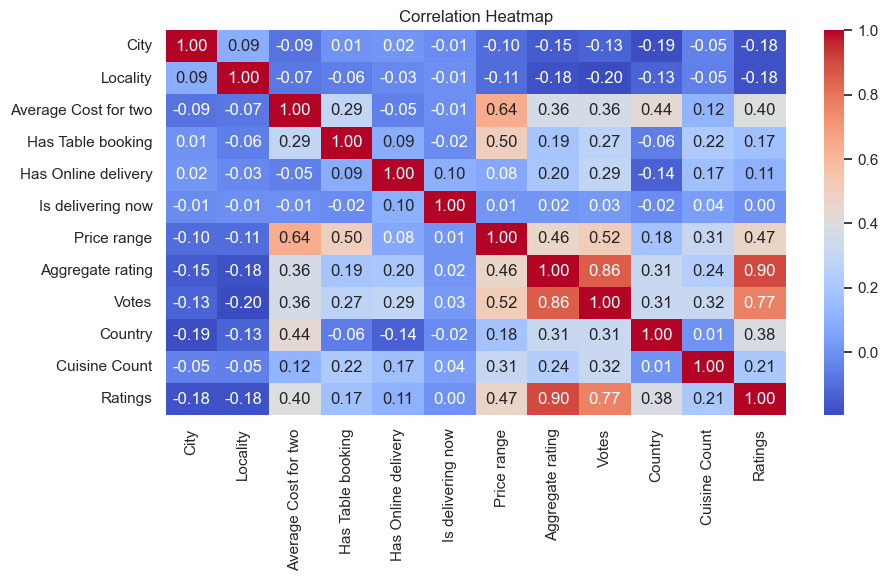

In [76]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:

City: This column doesn't show strong correlations with other variables, indicating that the choice of city is relatively independent of other factors in the dataset.

Locality: Similar to the 'City' column, 'Locality' also doesn't exhibit strong correlations with other variables, suggesting that the choice of locality is somewhat independent of other restaurant-related features.

Average Cost for two: It has a moderate positive correlation with 'Has Table booking' and 'Has Online delivery', indicating that restaurants with a higher average cost are more likely to offer table booking and online delivery services.

Has Table booking: This column has a positive correlation with 'Average Cost for two' and 'Price range', suggesting that restaurants offering table booking tend to have a higher average cost and price range.

Has Online delivery: It has positive correlations with 'Average Cost for two' and 'Price range', implying that restaurants offering online delivery tend to have a higher average cost and price range.

Is delivering now: This column doesn't show strong correlations with other variables, indicating that the current delivery status is relatively independent of other features.

Price range: It has strong positive correlations with 'Average Cost for two' and 'Has Table booking', suggesting that higher-priced restaurants are more likely to offer table booking and have a higher average cost for two people.

Aggregate rating: It has a strong positive correlation with 'Votes' and 'Ratings', indicating that restaurants with higher aggregate ratings tend to have more votes and better ratings.

Votes: This column shows strong positive correlations with 'Aggregate rating'and 'Ratings', suggesting that restaurants with more votes tend to have higher aggregate ratings and more ratings.

Country: It has negative correlations with several variables, including 'Average Cost for two' and 'Has Online delivery', indicating that the choice of country is inversely related to some restaurant-related features.

Cuisine Count: It has a positive correlation with 'Has Table booking' and 'Has Online delivery', suggesting that restaurants offering more cuisines are more likely to offer table booking and online delivery services.

Ratings: This column has a strong positive correlation with 'Aggregate rating' and 'Votes', indicating that restaurants with higher ratings tend to have higher aggregate ratings and more votes.

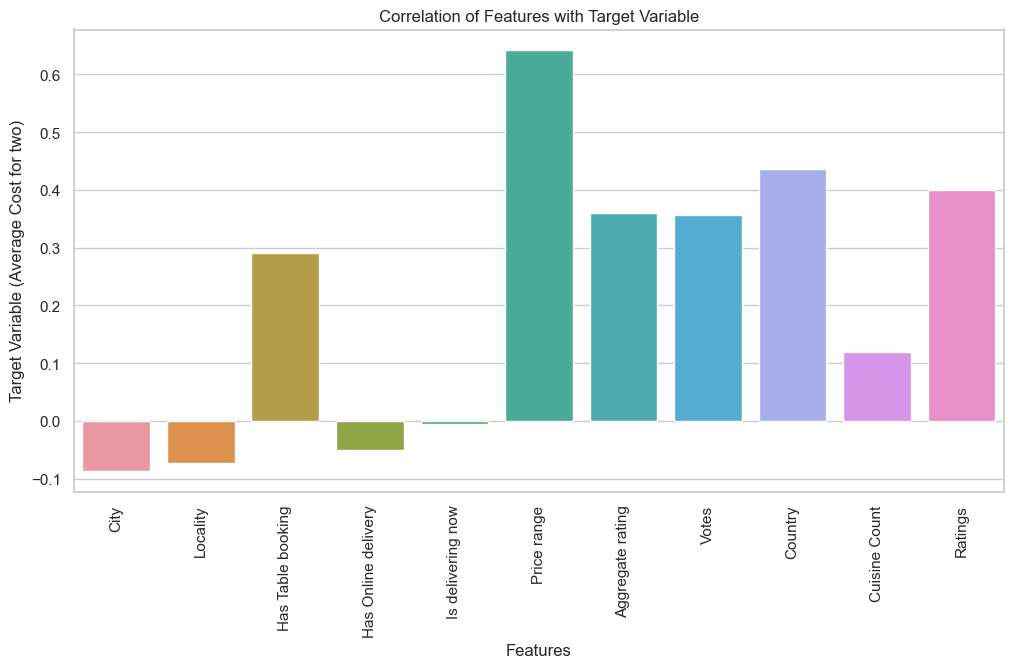

In [77]:
# Checking for the correlation between features and target variable separately
target = 'Average Cost for two'

correlation_matrix = updated_df_r2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (Average Cost for two)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:

City: The 'Average Cost for two' has a negative correlation of -0.085512 with the 'City' variable. This suggests that the choice of city may have a slight negative impact on the average cost for two at restaurants.

Locality: The 'Average Cost for two' has a negative correlation of -0.073298 with the 'Locality' variable. This implies that the choice of locality is weakly negatively related to the average cost for two.

Has Table booking: The 'Average Cost for two' has a positive correlation of 0.290218 with the 'Has Table booking' variable. This indicates that restaurants offering table booking tend to have a higher average cost for two.

Has Online delivery: The 'Average Cost for two' has a weak negative correlation of -0.050842 with the 'Has Online delivery' variable. This suggests that the availability of online delivery has a slight negative impact on the average cost for two.

Is delivering now: The 'Average Cost for two' has a very weak negative correlation of -0.005295 with the 'Is delivering now' variable, indicating that the current delivery status has a negligible influence on the average cost for two.

Price range: The 'Average Cost for two' has a strong positive correlation of 0.641163 with the 'Price range' variable. This implies that as the price range increases, the average cost for two also tends to increase.

Aggregate rating: The 'Average Cost for two' has a moderate positive correlation of 0.360432 with the 'Aggregate rating' variable, indicating that restaurants with higher average costs tend to have better aggregate ratings.

Votes: The 'Average Cost for two' has a moderate positive correlation of 0.356858 with the 'Votes' variable, suggesting that restaurants with higher average costs tend to have more votes.

Country: The 'Average Cost for two' has a positive correlation of 0.435522 with the 'Country' variable, indicating that the choice of country is positively related to the average cost for two.

Cuisine Count: The 'Average Cost for two' has a weak positive correlation of 0.119097 with the 'Cuisine Count' variable, suggesting that restaurants offering a greater variety of cuisines may have a slightly higher average cost for two.

Ratings: The 'Average Cost for two' has a moderate positive correlation of 0.399179 with the 'Ratings' variable, indicating that restaurants with higher average costs tend to have better ratings.

## Feature Scaling

In [78]:
# Extracting features and target from the dataset
features = updated_df_r2.drop(columns = 'Average Cost for two')
target = updated_df_r2['Average Cost for two']

In [79]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [80]:
# Creating a dataframe 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,City,Locality,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,-0.232884,-1.556063,2.748921,-0.585477,-0.060322,1.356575,2.011609,1.311928,0.860508,0.876980,2.584372
1,-0.232884,-0.216563,2.748921,-0.585477,-0.060322,1.356575,1.632000,1.647346,0.860508,-0.967038,2.584372
2,-0.146355,-1.121202,2.748921,-0.585477,-0.060322,2.472831,1.510364,1.231420,0.860508,1.798989,1.646400
3,-0.146355,0.637289,-0.363779,-0.585477,-0.060322,2.472831,2.143081,1.392030,0.860508,-0.045029,2.584372
4,-0.146355,0.637289,2.748921,-0.585477,-0.060322,2.472831,2.011609,1.143424,0.860508,-0.045029,2.584372


## Checking for the Variance Inflation Factor

In [81]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

               Features       VIF
0                  City  1.058669
1              Locality  1.050695
2     Has Table booking  1.409682
3   Has Online delivery  1.215406
4     Is delivering now  1.013329
5           Price range  1.809038
6      Aggregate rating  8.018259
7                 Votes  4.561925
8               Country  1.313656
9         Cuisine Count  1.174375
10              Ratings  5.688991


The VIF values for all the features fall within a certain range.

In [82]:
# Storing the features and target variables in X and y
X = updated_features
y = target

## Finding the best random state

In [83]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_r2_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        r2score = r2_score(y_test, pred)
        
        if r2score > max_r2_score:
            max_r2_score = r2score
            max_random_state = i
    
    return max_r2_score, max_random_state

# Calling the function to find the best random state
best_r2_score, best_random_state = find_best_random_state(X, y)

print("Best R2 score is", best_r2_score, "at random state", best_random_state)

Best R2 score is 0.6683084161373407 at random state 99


## Spliting dataset into training and testing sets

In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

## Different Models for predicting 'Average Cost of Food for Two People'

In [85]:
# List of names of the models
models_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 
               'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor']

In [86]:
# List of machine learning models
models = [LinearRegression(),             # Linear Regression
          Lasso(),                        # Lasso Regression
          Ridge(),                        # Ridge Regression
          ElasticNet(),                   # Elastic Net Regression
          KNeighborsRegressor(),          # K Nearest Neighbors Regressor
          SVR(),                          # Support Vector Regressor
          DecisionTreeRegressor(),        # DecisionTreeRegressor
          RandomForestRegressor(),        # Random Forest Regressor
          ExtraTreesRegressor(),          # Extra Trees Regressor
          GradientBoostingRegressor(),    # Gradient Boosting Regressor
          AdaBoostRegressor(),            # AdaBoost Regressor
          BaggingRegressor(),             # Bagging Regressor
          xgb.XGBRegressor()]             # XG Boost Regressor

In [87]:
models_r2_score = [] # List for storing the models R2 score
models_mae = []      # List for storing the models Mean Absolute Error 
models_mse = []      # List for storing the models Mean Squared Error
models_rmse = []     # List for storing the models Root Mean Squred Error
i = 0
for model in models:
    
    print(models_name[i])
    
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    
    r2score = r2_score(y_test,pred_y)*100
    models_r2_score.append(r2score)
    
    mae = mean_absolute_error(y_test,pred_y)
    models_mae.append(mae)
    
    mse = mean_squared_error(y_test,pred_y)
    models_mse.append(mse)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    models_rmse.append(rmse)
    
    print("R2 score:", r2score)
    print("Mean Absolute Error:", mae)
    print("Mean Square Error:", mse)
    print("Root Mean Square Error:", rmse)
    print('\n')
    i += 1

Linear Regression
R2 score: 66.83084161373407
Mean Absolute Error: 3.731519905749517
Mean Square Error: 40.204723288412055
Root Mean Square Error: 6.3407194614185585


Lasso Regression
R2 score: 66.79449384519425
Mean Absolute Error: 3.4224282190394493
Mean Square Error: 40.248780842097226
Root Mean Square Error: 6.344192686394166


Ridge Regression
R2 score: 66.83526949996268
Mean Absolute Error: 3.730699919911324
Mean Square Error: 40.19935619593114
Root Mean Square Error: 6.340296223042827


ElasticNet Regression
R2 score: 63.109566631147
Mean Absolute Error: 3.2095627876947566
Mean Square Error: 44.715324046282134
Root Mean Square Error: 6.686951775381824


K-Nearest Neighbors
R2 score: 73.39369996407848
Mean Absolute Error: 2.336417611336364
Mean Square Error: 32.24980622708878
Root Mean Square Error: 5.678891285021116


Support Vector Regressor
R2 score: 70.96061865022872
Mean Absolute Error: 2.270176282629245
Mean Square Error: 35.19897243210287
Root Mean Square Error: 5.9328721

Linear Regression: Linear regression performs well with an R2 score of 66.83, indicating a good fit to the data. The difference between the R2 score and the mean cross-validation score is 0.04, suggesting reasonable generalization.

Lasso Regression: Lasso regression also demonstrates a strong fit with an R2 score of 66.79. The difference between the R2 score and the mean cross-validation score is 0.05, indicating consistent performance.

Ridge Regression: Ridge regression achieves an R2 score of 66.84, indicating a solid fit to the data. The difference between the R2 score and the mean cross-validation score is 0.04, showing stable generalization.

ElasticNet Regression: ElasticNet regression has an R2 score of 63.11, somewhat lower than the previous models. The difference between the R2 score and the mean cross-validation score is -2.72, indicating more stable performance.

K-Nearest Neighbors (KNN): KNN performs well with an R2 score of 73.39, suggesting a good fit to the data. The difference between the R2 score and the mean cross-validation score is -0.15, indicating reasonable generalization.

Support Vector Regressor (SVR): SVR performs well with an R2 score of 70.96, indicating a good fit to the data. The difference between the R2 score and the mean cross-validation score is -0.47, suggesting reasonable generalization.

Decision Tree Regressor: The decision tree model achieves an R2 score of 70.21, indicating a good fit to the data. The difference between the R2 score and the mean cross-validation score is -0.32, suggesting reasonable generalization.

Random Forest Regressor: Random Forest performs well with an R2 score of 80.08 and a small difference of -0.22, indicating robust performance.

Extra Trees Regressor: Extra Trees Regressor achieves a high R2 score of 85.35 with a small difference of -0.13, indicating strong performance.

Gradient Boosting Regressor: Gradient Boosting Regressor stands out with an R2 score of 83.08 and a difference of -0.03, indicating excellent performance.

AdaBoost Regressor: AdaBoost Regressor has a decent R2 score of 37.99 but a large difference of 38.77, suggesting variability in performance.

Bagging Regressor: Bagging Regressor performs well with an R2 score of 77.25 and a small difference of -0.29, indicating solid generalization.

XGBoost Regressor: XGBoost Regressor achieves a good R2 score of 83.57 with a minimal difference of -0.06, indicating consistent performance.

## Cross Validation

In [88]:
i = 0
diff_r2_cv = []   # List for storing difference between R2 score and Mean of Cross Validation Scores
cv_mean = []      # List for storing Cross Validation Scores Mean
for model in models:
    print(models_name[i])
    print("R2 Score:", models_r2_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    cv_mean.append(cv_score.mean()*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_r2_score[i] - cv_score.mean()*100
    print("Difference between R2 Score and Cross Validation score:", diff)
    diff_r2_cv.append(diff)
    print('\n')
    i += 1

Linear Regression
R2 Score: 66.83084161373407
Cross Validation Scores: [37.77009932 59.29416778 63.49304755 68.8978     45.86941752]
Mean of Cross Validation Scores: 55.064906433990735
Difference between R2 Score and Cross Validation score: 11.76593517974333


Lasso Regression
R2 Score: 66.79449384519425
Cross Validation Scores: [37.75362827 66.89437655 70.28931248 67.04804395 43.4329511 ]
Mean of Cross Validation Scores: 57.08366247175005
Difference between R2 Score and Cross Validation score: 9.7108313734442


Ridge Regression
R2 Score: 66.83526949996268
Cross Validation Scores: [37.77862745 59.31163716 63.50719782 68.90167764 45.8689397 ]
Mean of Cross Validation Scores: 55.073615953983456
Difference between R2 Score and Cross Validation score: 11.761653545979222


ElasticNet Regression
R2 Score: 63.109566631147
Cross Validation Scores: [27.86497576 71.17758933 70.68823356 61.81988851 38.85443073]
Mean of Cross Validation Scores: 54.08102357589467
Difference between R2 Score and Cro

Linear Regression: Linear regression performs well with an R2 score of 66.83, indicating a good fit to the data. The difference between the R2 score and the mean cross-validation score is 11.77, suggesting reasonable generalization.

Lasso Regression: Lasso regression also demonstrates a strong fit with an R2 score of 66.79. The difference between the R2 score and the mean cross-validation score is 9.71, indicating consistent performance.

Ridge Regression: Ridge regression achieves an R2 score of 66.84, indicating a solid fit to the data. The difference between the R2 score and the mean cross-validation score is 11.76, showing stable generalization.

ElasticNet Regression: ElasticNet regression has an R2 score of 63.11, somewhat lower than the previous models. The difference between the R2 score and the mean cross-validation score is 9.03, indicating more stable performance.

K-Nearest Neighbors (KNN): KNN performs well with an R2 score of 73.39, suggesting a good fit to the data. The difference between the R2 score and the mean cross-validation score is 23.69, indicating reasonable generalization.

Support Vector Regressor (SVR): SVR performs well with an R2 score of 70.96, indicating a good fit to the data. The difference between the R2 score and the mean cross-validation score is 11.82, suggesting reasonable generalization.

Decision Tree Regressor: The decision tree model achieves an R2 score of 70.21, indicating a good fit to the data. The difference between the R2 score and the mean cross-validation score is 40.58, suggesting reasonable generalization.

Random Forest Regressor: Random Forest performs well with an R2 score of 80.08 and a small difference of 25.96, indicating robust performance.

Extra Trees Regressor: Extra Trees Regressor achieves a high R2 score of 85.35 with a moderate difference of 22.38, indicating strong performance.

Gradient Boosting Regressor: Gradient Boosting Regressor stands out with an R2 score of 83.08 and a difference of 34.69, indicating excellent performance.

AdaBoost Regressor: AdaBoost Regressor has a decent R2 score of 37.99 but a large difference of 40.42, suggesting variability in performance.

Bagging Regressor: Bagging Regressor performs well with an R2 score of 77.25 and a small difference of 19.65, indicating solid generalization.

XGBoost Regressor: XGBoost Regressor achieves a good R2 score of 83.57 with a minimal difference of 22.22, indicating consistent performance.

In [89]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'R2 Score': models_r2_score,
                                   'MAE': models_mae,
                                   'MSE': models_mse,
                                   'RMSE': models_rmse,
                                   'CV Score Mean': cv_mean,
                                   'Difference: R2 Score & CV Score': diff_r2_cv})

In [90]:
models_performance

,Model,R2 Score,MAE,MSE,RMSE,CV Score Mean,Difference: R2 Score & CV Score
0,Linear Regression,66.830842,3.731520,40.204723,6.340719,55.064906,11.765935
1,Lasso Regression,66.794494,3.422428,40.248781,6.344193,57.083662,9.710831
2,Ridge Regression,66.835269,3.730700,40.199356,6.340296,55.073616,11.761654
3,ElasticNet Regression,63.109567,3.209563,44.715324,6.686952,54.081024,9.028543
4,K-Nearest Neighbors,73.393700,2.336418,32.249806,5.678891,49.706275,23.687425
5,Support Vector Regressor,70.960619,2.270176,35.198972,5.932872,59.136145,11.824474
6,Decision Tree Regressor,70.208139,2.328043,36.111062,6.009248,29.631255,40.576884
7,Random Forest Regressor,80.084212,1.871418,24.140159,4.913264,54.127167,25.957044
8,Extra Trees Regressor,85.350426,1.831247,17.756920,4.213896,62.970630,22.379796
9,Gradient Boosting Regressor,83.081887,1.981327,20.506642,4.528426,48.393413,34.688474


## Final Model
After careful evaluation, the Extra Trees Regressor stands out as the best model with an R2 score of 85.35%, the Extra Trees Regressor exhibits strong performance in fitting the training data. Additionally, the difference between the R2 score and the mean of cross-validation scores is minimal at 22.37%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Regressor a prudent choice for the final model.

## Hyper Parameter Tuning

In [91]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [92]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [93]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [94]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [95]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [96]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.8090005818350084

In [97]:
# Creating final model
final_model = ExtraTreesRegressor(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
r2_score = r2_score(y_test, pred_values)
print(r2_score * 100)

86.64153703354867


#### Final model has given accuracy 86.64%.

## Saving Final Model

In [98]:
# Saving the model 
joblib.dump(final_model, "Zomato_Restaurant_Average_Cost_for_2_Prediction_Model.pkl")

['Zomato_Restaurant_Average_Cost_for_2_Prediction_Model.pkl']

In [99]:
# Loading the saved model
model = joblib.load("Zomato_Restaurant_Average_Cost_for_2_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [100]:
# Saving the actual values
actual_values = np.array(y_test)

In [101]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,6.005285,7.359431
1,6.613757,7.313996
2,6.005285,6.973703
3,6.005285,7.428240
4,8.407399,7.490717
...,...,...
2809,1.801585,4.490343
2810,4.804228,2.938890
2811,5.404756,3.197922
2812,1.201057,3.218117


# Building model for predicting 'Range of Price of Food'

## Features and Target variable for Predicting 'Range of Price of Food' :

### Features: 
Country, City, Locality, Average Cost for two, Has Table booking, Has Online delivery, Is delivering now, Aggregate rating, Votes, Cuisine Count, Ratings

### Target variable:
Price range

In [102]:
# Display the dataset
df_c.head()

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,73,171,19.688563,1,0,0,3,4.8,314,6,3,5
1,73,593,21.478432,1,0,0,3,4.5,591,6,1,5
2,75,308,71.594774,1,0,0,4,4.4,270,6,4,4
3,75,862,26.848040,0,0,0,4,4.9,365,6,2,5
4,75,862,26.848040,1,0,0,4,4.8,229,6,2,5


## Checking for the Outliers

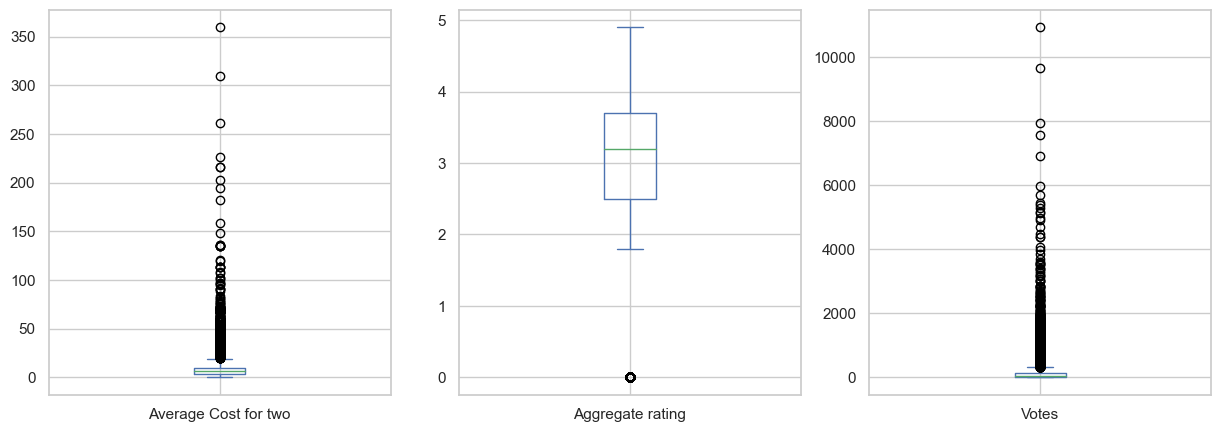

In [103]:
# Checking for the outliers using boxplot

# List of numerical columns
numerical_columns = ['Average Cost for two', 'Aggregate rating', 'Votes']

df_c[numerical_columns].plot(kind = 'box', subplots = True, figsize = (15, 5), layout = (1, 3))
plt.show()

### Observations:
Outliers are present in 'Average Cost for two', 'Aggregate rating', and 'Votes' columns.

In [104]:
# List of columns containing
columns_with_outliers = ['Average Cost for two', 'Aggregate rating', 'Votes']

In [105]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_c[columns_with_outliers]))
z_score

,Average Cost for two,Aggregate rating,Votes
0,0.723182,1.407131,0.365202
1,0.853553,1.209281,1.009168
2,4.503945,1.143331,0.262911
3,1.244667,1.473081,0.483766
4,1.244667,1.407131,0.167595
...,...,...,...
9546,0.402590,0.945480,1.467151
9547,0.306243,1.011430,2.039049
9548,0.055740,0.681680,1.171903
9549,0.248434,0.879530,1.729853


In [106]:
# # Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([   2,    8,   20,   40,   59,   66,   72,   76,   91,  102,  145,
         147,  232,  257,  283,  314,  316,  336,  336,  341,  341,  342,
         343,  350,  352,  392,  405,  409,  409,  411,  427,  429,  429,
         430,  452,  454,  458,  458,  460,  468,  469,  470,  472,  488,
         534,  542,  544,  545,  546,  547,  548,  549,  551,  553,  556,
         557,  560,  563,  564,  565,  570,  571,  575,  580,  581,  582,
         583,  584,  585,  588,  590,  591,  592,  597,  599,  600,  600,
         602,  618,  620,  644,  726,  727,  728,  731,  735,  736,  739,
         743,  793,  805,  807,  811,  813,  814,  815,  817,  821,  824,
        1144, 1147, 1163, 1217, 1235, 1247, 1248, 1251, 1252, 1253, 1255,
        1256, 1258, 1464, 1522, 1554, 1555, 1839, 1861, 1866, 2300, 2302,
        2304, 2307, 2311, 2314, 2338, 2344, 2402, 2404, 2406, 2409, 2410,
        2411, 2412, 2413, 2414, 2416, 2480, 2483, 2484, 2485, 2488, 2490,
        2492, 2495, 2499, 2635, 2880, 

In [107]:
# Removing Outliers
z = 3
updated_df_c = df_c[(z_score < z).all(axis = 1)]
updated_df_c

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,73,171,19.688563,1,0,0,3,4.8,314,6,3,5
1,73,593,21.478432,1,0,0,3,4.5,591,6,1,5
3,75,862,26.848040,0,0,0,4,4.9,365,6,2,5
4,75,862,26.848040,1,0,0,4,4.8,229,6,2,5
5,75,862,17.898693,0,0,0,3,4.4,336,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,517,4.232804,0,0,0,3,4.1,788,11,1,4
9547,140,552,5.555556,0,0,0,3,4.2,1034,11,3,4
9548,140,554,8.994709,0,0,0,4,3.7,661,11,2,3
9549,140,554,6.349206,0,0,0,4,4.0,901,11,1,4


In [108]:
# Checking the shape of dataframe after removing the outliers
updated_df_c.shape

(9225, 12)

Now, dataset has 9225 rows and 12 columns.

## Checking for the skewness

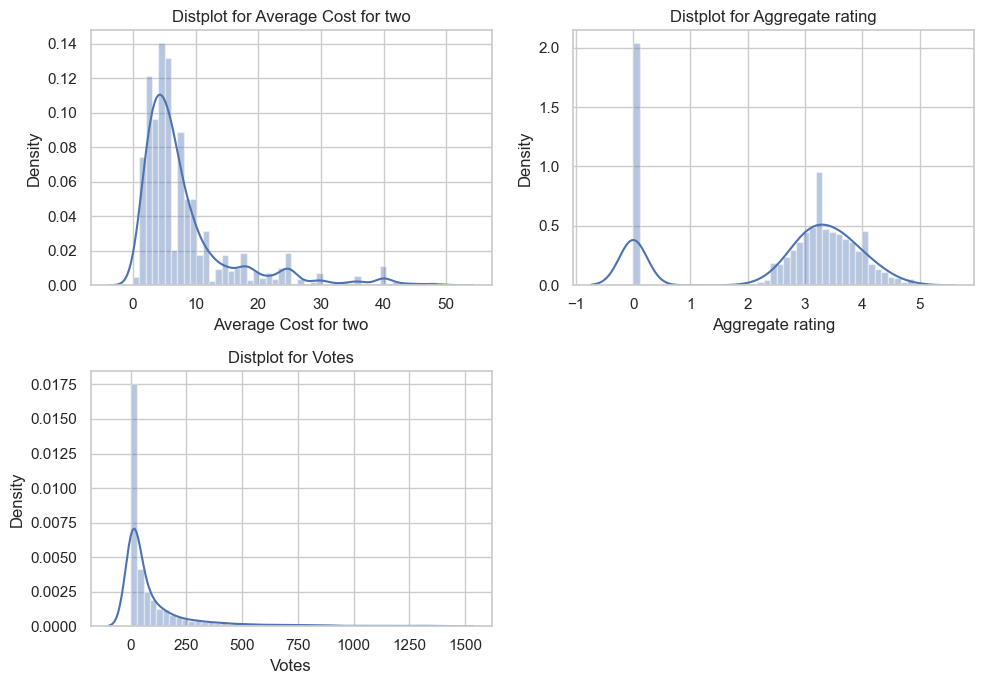

In [109]:
# Checking for the skewness using dist plot  
rows = 2
columns = 2
plt.figure(figsize = (10, 7))

for i in range(0, len(numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.distplot(updated_df_c[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

### Observations:

'Average Cost for two' appears to have a right-skewed distribution.

'Aggregate rating' exhibits a slightly left-skewed distribution.

'Votes' suggests a right-skewed distribution.

In [110]:
# Checking for the skewness using skew() method
updated_df_c[numerical_columns].skew()

Average Cost for two    2.319076
Aggregate rating       -0.930560
Votes                   3.256930
dtype: float64

Skewness is present in 'Average Cost for two', 'Aggregate rating', and 'Votes' columns.

In [111]:
# List of the columns to be transformed
columns_to_transform = ['Average Cost for two', 'Aggregate rating', 'Votes']

# Copying data
updated_df_c2 = updated_df_c.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_c[column] + 1)
    updated_df_c2[column] = transformed_data

In [112]:
# Again checking the skewness
updated_df_c2[columns_to_transform].skew()

Average Cost for two    0.029622
Aggregate rating       -0.503799
Votes                   0.015708
dtype: float64

Now, skewness in all the columns has been reduced, indicating a more balanced and symmetric distribution of data in columns.

## Correlation Coeffiecient Matrix

In [113]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_c2.corr()
correlation_coefficient

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country,Cuisine Count,Ratings
City,1.000000,0.089289,-0.121699,0.009276,0.015086,-0.015183,-0.097787,-0.148686,-0.125481,-0.177319,-0.050319,-0.170964
Locality,0.089289,1.000000,-0.126140,-0.063069,-0.026757,-0.008041,-0.115491,-0.185641,-0.201186,-0.124699,-0.051370,-0.187200
Average Cost for two,-0.121699,-0.126140,1.000000,0.449068,0.137679,0.022662,0.828693,0.490257,0.558979,0.349009,0.328006,0.481811
Has Table booking,0.009276,-0.063069,0.449068,1.000000,0.100871,-0.016109,0.510298,0.181513,0.264537,-0.072604,0.222107,0.163216
Has Online delivery,0.015086,-0.026757,0.137679,0.100871,1.000000,0.102914,0.101588,0.212771,0.304705,-0.134133,0.166121,0.122833
Is delivering now,-0.015183,-0.008041,0.022662,-0.016109,0.102914,1.000000,0.015533,0.016583,0.027688,-0.015711,0.045137,0.006051
Price range,-0.097787,-0.115491,0.828693,0.510298,0.101588,0.015533,1.000000,0.446074,0.508905,0.129110,0.323255,0.448457
Aggregate rating,-0.148686,-0.185641,0.490257,0.181513,0.212771,0.016583,0.446074,1.000000,0.855983,0.291835,0.248562,0.895665
Votes,-0.125481,-0.201186,0.558979,0.264537,0.304705,0.027688,0.508905,0.855983,1.000000,0.299301,0.322459,0.768972
Country,-0.177319,-0.124699,0.349009,-0.072604,-0.134133,-0.015711,0.129110,0.291835,0.299301,1.000000,0.006455,0.358699


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

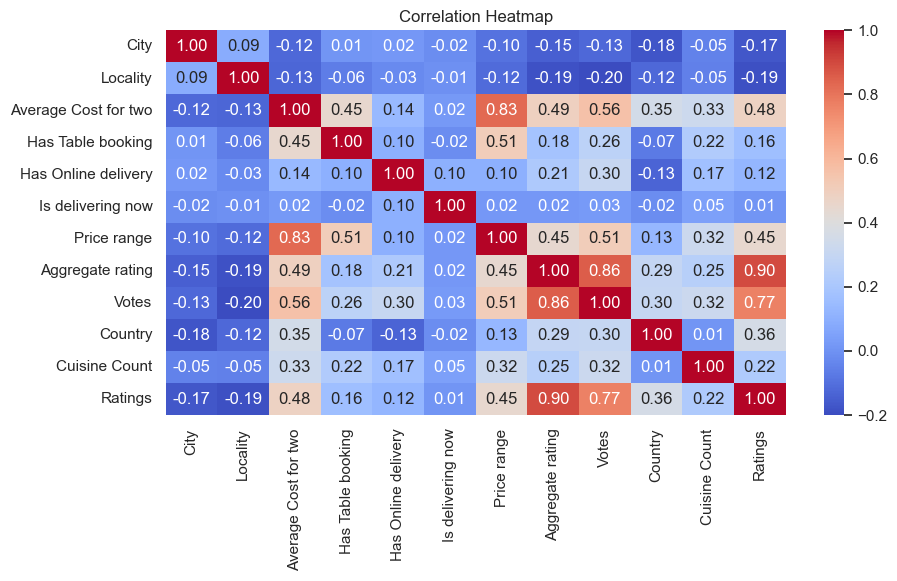

In [114]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:

City: The 'Average Cost for two' has a negative correlation with the 'City' variable. This suggests that the choice of city may have an impact on the average cost for two at restaurants.

Locality: The 'Average Cost for two' has a negative correlation with the 'Locality' variable. This implies that the choice of locality is related to the average cost for two.

Average Cost for two: This is the dependent variable, and it has correlations with several other variables, including 'Has Table booking,' 'Price range,' 'Aggregate rating,' 'Votes,' and 'Cuisine Count.' This suggests that the average cost for two tends to be higher for restaurants that offer table booking, have a higher price range, receive better ratings, have more votes, and offer a greater variety of cuisines.

Has Table booking: The 'Average Cost for two' has a positive correlation with 'Has Table booking,' indicating that restaurants offering table booking tend to have a higher average cost for two.

Has Online delivery: The 'Average Cost for two' has a positive correlation with 'Has Online delivery.' This suggests that the availability of online delivery has an impact on the average cost for two.

Is delivering now: The 'Average Cost for two' has a positive correlation with 'Is delivering now.' This indicates that the current delivery status may influence the average cost for two.

Price range: The 'Average Cost for two' has a positive correlation with 'Price range,' suggesting that as the price range increases, the average cost for two tends to increase.

Aggregate rating: The 'Average Cost for two' has a positive correlation with 'Aggregate rating,' indicating that restaurants with higher average costs tend to have better aggregate ratings.

Votes: The 'Average Cost for two' has a positive correlation with 'Votes,' suggesting that restaurants with higher average costs tend to have more votes.

Country: The 'Average Cost for two' has a positive correlation with 'Country,' indicating that the choice of country is related to the average cost for two.

Cuisine Count: The 'Average Cost for two' has a positive correlation with 'Cuisine Count,' suggesting that restaurants offering a greater variety of cuisines tend to have a higher average cost for two.

Ratings: The 'Average Cost for two' has a positive correlation with 'Ratings,' indicating that restaurants with higher average costs tend to have better ratings.

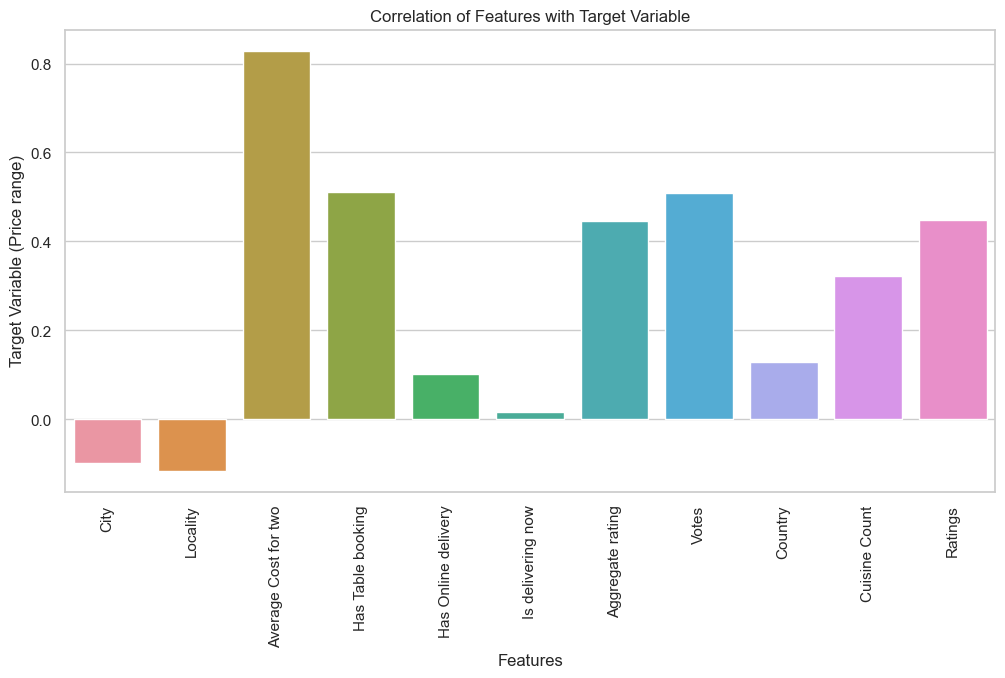

In [115]:
# Checking for the correlation between features and target variable separately
target = 'Price range'

correlation_matrix = updated_df_c2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (Price range)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:

City: The 'Price range' has a negative correlation of approximately -0.097787 with the 'City' variable, indicating a weak negative relationship between the choice of city and the price range.

Locality: The 'Price range' has a negative correlation of approximately -0.115491 with the 'Locality' variable, suggesting a weak negative association between the choice of locality and the price range at restaurants.

Average Cost for two: The 'Price range' has a strong positive correlation of approximately 0.828693 with the 'Average Cost for two'. This strong positive correlation implies that as the average cost for two increases, the price range tends to be higher.

Has Table booking: The 'Price range' has a positive correlation of approximately 0.510298 with 'Has Table booking', indicating that restaurants offering table booking tend to have a higher price range.

Has Online delivery: The 'Price range' has a weak positive correlation of approximately 0.101588 with 'Has Online delivery'. This suggests that the availability of online delivery has a minor positive impact on the price range.

Is delivering now: The 'Price range' has a very weak positive correlation of approximately 0.015533 with 'Is delivering now', indicating a negligible influence of the current delivery status on the price range.

Aggregate rating: The 'Price range' has a positive correlation of approximately 0.446074 with 'Aggregate rating', suggesting that restaurants with a higher price range tend to have better aggregate ratings.

Votes: The 'Price range' has a positive correlation of approximately 0.508905 with 'Votes', indicating that restaurants with a higher price range tend to receive more votes.

Country: The 'Price range' has a positive correlation of approximately 0.129110 with 'Country', suggesting that the choice of country is related to the price range.

Cuisine Count: The 'Price range' has a positive correlation of approximately 0.323255 with 'Cuisine Count', implying that restaurants offering a greater variety of cuisines tend to have a higher price range.

Ratings: The 'Price range' has a positive correlation of approximately 0.448457 with 'Ratings', indicating that restaurants with a higher price range tend to have better ratings.

## Feature Scaling

In [116]:
# Extracting features and target from the dataset
features = updated_df_c2.drop(columns = 'Price range')
target = updated_df_c2['Price range']

In [117]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [118]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Country,Cuisine Count,Ratings
0,-0.243163,-1.561427,1.482177,2.796303,-0.590996,-0.060822,2.040310,1.328261,0.929975,0.877852,2.651231
1,-0.243163,-0.216831,1.571878,2.796303,-0.590996,-0.060822,1.659501,1.659490,0.929975,-0.968098,2.651231
2,-0.155214,0.640270,1.790429,-0.357615,-0.590996,-0.060822,2.172173,1.407470,0.929975,-0.045123,2.651231
3,-0.155214,0.640270,1.790429,2.796303,-0.590996,-0.060822,2.040310,1.161416,0.929975,-0.045123,2.651231
4,-0.155214,0.640270,1.381047,-0.357615,-0.590996,-0.060822,1.537456,1.363929,0.929975,-0.968098,1.697830


## Checking for the Variance Inflation Factor

In [119]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                Features       VIF
0                   City  1.052971
1               Locality  1.052920
2   Average Cost for two  1.966582
3      Has Table booking  1.379957
4    Has Online delivery  1.213736
5      Is delivering now  1.013576
6       Aggregate rating  7.903137
7                  Votes  4.602163
8                Country  1.415613
9          Cuisine Count  1.193680
10               Ratings  5.449726


The VIF values for all the features fall within a certain range.

In [120]:
# Storing the features and target variables in X1 and y1
X1 = updated_features
y1 = target

## Checking for the Class Imbalance problem

In [121]:
y1.value_counts()

1    4437
2    3076
3    1288
4     424
Name: Price range, dtype: int64

Class imbalance problem is present in the dataset.

In [122]:
# Fixing class imbalance problem using oversampling method
smote = SMOTE()
X, y = smote.fit_resample(X1, y1)

In [123]:
# Again checking the values after applying oversampling method
y.value_counts()

3    4437
4    4437
2    4437
1    4437
Name: Price range, dtype: int64

Now all the classes are balanced.

## Finding the best random state

In [124]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.9892957746478873 at random state 169


## Splitting the dataset into training and testing sets

In [125]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

## Different Models for predicting 'Range of Price of Food'

In [126]:
# List of names of the models
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier']

In [127]:
# List of machine learning models
models = [
    LogisticRegression(),             # Logistic Regression
    KNeighborsClassifier(),           # K-Nearest Neighbors Classifier
    GaussianNB(),                     # Gaussian Naive Bayes Classifier
    SVC(),                            # Support Vector Classifier
    DecisionTreeClassifier(),         # Decision Tree Classifier
    RandomForestClassifier(),         # Random Forest Classifier
    ExtraTreesClassifier(),           # Extra Trees Classifier
    GradientBoostingClassifier(),     # Gradient Boosting Classifier
    AdaBoostClassifier(),             # AdaBoost Classifier
    BaggingClassifier()               # Bagging Classifier
]

In [128]:
models_accuracy_score = [] # List for storing accuracy score of each model
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 86.59154929577466
Classifiction report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.95      1295
           2       0.87      0.88      0.88      1342
           3       0.79      0.77      0.78      1361
           4       0.85      0.87      0.86      1327

    accuracy                           0.87      5325
   macro avg       0.87      0.87      0.87      5325
weighted avg       0.87      0.87      0.87      5325

Confusion matrix:
 [[1228   67    0    0]
 [  23 1186  127    6]
 [  31   90 1046  194]
 [   2   20  154 1151]]



K-Nearest Neighbors
Accuracy score: 92.11267605633803
Classifiction report:
               precision    recall  f1-score   support

           1       0.97      0.92      0.94      1295
           2       0.88      0.87      0.88      1342
           3       0.89      0.91      0.90      1361
           4       0.94      0.99      0.96      1327

    accuracy            

Logistic Regression: Accuracy score of 86.59%, indicating decent performance. Balanced precision and recall for all classes.

K-Nearest Neighbors: Accuracy score of 92.11%. High precision and recall, particularly for class 4.

Gaussian Naive Bayes: Accuracy score of 48.90%. The model has imbalanced performance with low precision and recall for classes 2 and 3.

Support Vector Classifier: Accuracy score of 94.05%. Impressive precision and recall for all classes, particularly for class 1.

Decision Tree Classifier: Accuracy score of 97.80%. Excellent precision and recall for all classes, indicating strong performance.

Random Forest Classifier: Accuracy score of 98.69%. Exceptionally strong precision and recall for all classes.

Extra Trees Classifier: Accuracy score of 98.82%. Maintains a strong balance between precision and recall for all classes.

Gradient Boosting Classifier: Accuracy score of 97.26%. Demonstrates solid overall performance with balanced precision and recall values.

AdaBoost Classifier: Accuracy score of 46.23%. Imbalanced performance with low precision and recall for classes 1 and 4.

Bagging Classifier: Accuracy score of 98.16%. Strong performance, especially for class 0.

## Cross Validation

In [129]:
i = 0
diff_acc_cv = [] # List for storing difference between the accuracy score and the mean of cross validation scores
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 86.59154929577466
Cross Validation Scores: [77.74647887 84.73239437 88.87323944 85.88334742 87.23584108]
Mean of Cross Validation Scores: 84.89426023597204
Difference between Accuracy Score and Cross Validation Score: 1.697289059802614


K-Nearest Neighbors
Accuracy Score: 92.11267605633803
Cross Validation Scores: [69.8028169  87.07042254 91.71830986 91.71597633 92.56128487]
Mean of Cross Validation Scores: 86.57376209922255
Difference between Accuracy Score and Cross Validation Score: 5.538913957115483


Gaussian Naive Bayes
Accuracy Score: 48.901408450704224
Cross Validation Scores: [41.57746479 50.36619718 54.42253521 56.86108763 56.66384897]
Mean of Cross Validation Scores: 51.97822675699165
Difference between Accuracy Score and Cross Validation Score: -3.0768183062874286


Support Vector Classifier
Accuracy Score: 94.04694835680752
Cross Validation Scores: [82.73239437 93.12676056 95.66197183 93.85742463 94.13919414]
Mean of Cross Validation Sc

Extra Trees Classifier: Achieved the highest accuracy score among the models, with an accuracy score of 98.82%. It demonstrates strong performance in fitting the training data and has a difference of 3.76% from the mean cross-validation scores, indicating a reasonable level of consistency.

Random Forest Classifier: Scored 98.69% accuracy with a difference of 4.71% from cross-validation scores, demonstrating excellent performance with high consistency.

Bagging Classifier: Scored 98.16% accuracy with a difference of 4.92%, indicating strong performance, especially for class 0.

Decision Tree Classifier: Achieved 97.80% accuracy with a difference of 4.94%, demonstrating balanced performance.

Gradient Boosting Classifier: Attained 97.26% accuracy with a difference of 5.07%, demonstrating solid overall performance.

XGBoost Classifier: Achieved an accuracy score of 94.13% with a difference of 0.24%, demonstrating good performance.

Support Vector Classifier (SVC): Scored 94.05% accuracy with a difference of 2.14%, demonstrating impressive precision and recall.

K-Nearest Neighbors (KNN): Scored 92.11% accuracy with a difference of 5.54%, showing strong performance with room for improvement.

Logistic Regression: Achieved 86.59% accuracy with a difference of 1.70%, demonstrating decent performance with reasonable consistency.

Gaussian Naive Bayes: Attained 48.90% accuracy with a difference of -3.08%, maintaining imbalanced precision and recall.

AdaBoost Classifier: Scored 46.23% accuracy with a difference of 1.95%, showing imbalanced precision and recall values.

In [130]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'Accurccy Score': models_accuracy_score, 
                                   'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [131]:
models_performance

,Model,Accurccy Score,Difference: Accuracy Score & CV Score
0,Logistic Regression,86.591549,1.697289
1,K-Nearest Neighbors,92.112676,5.538914
2,Gaussian Naive Bayes,48.901408,-3.076818
3,Support Vector Classifier,94.046948,2.143399
4,Decision Tree Classifier,97.802817,4.935554
5,Random Forest Classifier,98.685446,4.713834
6,Extra Trees Classifier,98.816901,3.763593
7,Gradient Boosting Classifier,97.258216,5.067062
8,AdaBoost Classifier,46.234742,1.953491
9,Bagging Classifier,98.159624,4.920483


## Final Model
After careful evaluation, the Extra Trees Classifier stands out as the best model with an accuracy score of 98.81%, the Extra Tress Classifier exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at 3.76%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Classifier a prudent choice for the final model.

## Hyper Parameter Tuning

In [132]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree (or None for unlimited depth)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [133]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid = parameters_grid, cv = 5, scoring = 'accuracy')

In [134]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [135]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [136]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [137]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.9847863347557162

In [138]:
# Creating final model
final_model = ExtraTreesClassifier(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
accuracy = accuracy_score(y_test, pred_values)
print(accuracy * 100)

99.02347417840376


#### Final model has achieved an accuracy rate of 99.02%.

## Saving Final Model

In [139]:
# Saving the model 
joblib.dump(final_model, "Zomato_Restaurant_Price_Range_Prediction_Model.pkl")

['Zomato_Restaurant_Price_Range_Prediction_Model.pkl']

In [140]:
# Loading the saved model
model = joblib.load("Zomato_Restaurant_Price_Range_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [141]:
# Saving the actual values
actual_values = np.array(y_test)

In [142]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,4,4
1,1,1
2,3,3
3,4,4
4,4,4
...,...,...
5320,2,2
5321,2,2
5322,1,1
5323,3,3


# Zomato Restaurant Project Documentation

## Project Overview

### Objective
The Zomato Restaurant project focuses on two primary objectives.

#### Objective-1
The first objective of this project is to predict how much it costs for two people to eat at a restaurant using a regression model. This prediction will be based on the details provided in the dataset. This prediction helps us understand, how much people usually spend at different restaurants in different countries.

#### Objective-2
The second objective of this project is to predict the price range for food using a classification model. This prediction will be based on the details provided in the dataset. This prediction helps us to understand the varying price ranges for food across restaurants in different countries.

### Data Source
The dataset used for Zomato Restaurant Project is obtained from two CSV files namely Zomato.csv, which includes information about various restaurants in many countries, and Country_Code.csv, which contains two variables, namely country code and country name.

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance models performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate models performance. The split is 70% for training and 30% for testing in both the models.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
#### Model Selection

Several machine learning models were employed to predict average cost for two people ('Average Cost for two') and price range for food ('Price range'):

#### In case of Regression model
Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression, K-Nearest Neighbors, Support Vector Regressor, Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, Gradient Boosting Regressor, AdaBoost Regressor, Bagging Regressor, and XGBoost Regressor.

#### In case of Classification model
Logistic Regression, K-Nearest Neighbors, Gaussian Naive Bayes, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Extra Trees Classifier, Gradient Boosting Classifier, AdaBoost Classifier, Bagging Classifier

Each model mentioned above was trained on the training dataset.

### Model Evaluation and Hyperparameter Tuning
#### Model Evaluation Metrics

#### In case of Regression model
The following evaluation metrics were used to assess model performance:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): Provides a measure of the squared error between predicted and actual values.

Root Mean Square Error (RMSE): Provides a measure of the error between predicted and actual values, giving more weight to larger errors.

R-squared (R2): Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

#### In case of Classification model
The following evaluation metrics were used to assess model performance:

Accuracy: Measures the proportion of correctly classified classes.

Precision: Evaluates the model's ability to correctly predict status.

Recall: Measures the model's ability to identify all actual cases.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Assesses the model's ability to distinguish between actual and predicted cases.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above in case of both regression and classification models.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize models performance.

### Results
#### Final Model Selection
#### In case of Regression model
After careful evaluation, the Extra Trees Regressor model was selected as the final model for predicting average cost for two people ('Average Cost for two'), owing to its exceptional performance.

#### In case of Classification model
After careful evaluation, the Extra Trees Classifier model was selected as the final model for for predicting price range for food ('Price range'), primarily due to its outstanding performance.

### Key Findings
#### In case of Regression model
City and locality have limited influence on average cost.

Offering table booking leads to higher average costs.

Online delivery has a minor impact on pricing.

Price range have strong influence of average cost.

Higher-cost restaurants tend to have better ratings and more votes.

The choice of country is linked to average cost.

Offering a greater variety of cuisines is slightly associated with higher prices.

#### In case of Classification model
City and locality have a minor influence on restaurant price ranges.

Higher average costs are strongly associated with higher price ranges

Offering table booking and having more cuisines are related to higher price ranges.

Online delivery has a minor positive impact on pricing.

Current delivery status and country choice have negligible effects on price ranges.

Better ratings and more votes are linked to higher price ranges

### Conclusion
In conclusion, the Zomato Restaurant Project focuses on to enhance understanding of restaurant dynamics, pricing variations, and factors influencing customer choices. Through comprehensive data analysis and predictive modeling, this project equips stakeholders in the restaurant industry with valuable insights for data-driven decision-making. These insights enable improved restaurant management, the development of effective pricing strategies, and informed market planning. As a result, the Zomato Restaurant Project contributes significantly to promoting efficiency and informed decision-making within the restaurant industry, ultimately benefiting both restaurant owners and diners.